**EDA Final Submission**

### Import necessary Libraries

In [ ]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import statistics
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the data set 
check the data set
<hr/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
app_d = pd.read_csv("/content/drive/MyDrive/application_data.csv")

In [ ]:
app_d.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
prev_d = pd.read_csv("/content/drive/MyDrive/previous_application (1).csv")

In [ ]:
prev_d.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                     15.0                           Y   
1                     11.0                           Y   
2                     11.0                           Y   
3                      7.0                           Y   
4                      9.0                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                     1.0                0.0               0.182832   
1                     1.0                NaN                    NaN   
2                     1.0                NaN                    NaN   
3                     1.0                NaN                    NaN   
4                     1.0                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0          -73.0  Cash through the bank                XAP              NaN   
1         -164.0                    XNA                XAP    Unaccompanied   
2         -301.0  Cash through the bank                XAP  Spouse, partner   
3         -512.0  Cash through the bank                XAP              NaN   
4         -781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide              35.0         Connectivity   
1           Contact center              -1.0                  XNA   
2  Credit and cash offices              -1.0                  XNA   
3  Credit and cash offices              -1.0                  XNA   
4  Credit and cash offices              -1.0                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
column_d = pd.read_csv("/content/drive/MyDrive/columns_description (1).csv", encoding='cp1252')

In [ ]:
column_d.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [ ]:
app_d.shape

(89237, 122)

In [ ]:
app_d.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
app_d.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   89237.000000  89237.000000  89237.000000      8.923700e+04   
mean   151752.082567      0.080706      0.416699      1.694528e+05   
std     29853.306338      0.272385      0.721152      4.045315e+05   
min    100002.000000      0.000000      0.000000      2.565000e+04   
25%    125967.000000      0.000000      0.000000      1.125000e+05   
50%    151689.000000      0.000000      0.000000      1.440000e+05   
75%    177607.000000      0.000000      1.000000      2.025000e+05   
max    203609.000000      1.000000     12.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  8.923700e+04   89231.000000     8.916000e+04   
mean   5.987953e+05   27066.818578     5.381043e+05   
std    4.018051e+05   14441.748685     3.691735e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16456.500000     2.385000e+05   
50%    5.124465e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34587.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                89237.000000  89237.000000   89237.000000   
mean                     0.020849 -16033.026917   63382.939330   
std                      0.013809   4369.486636  140920.125894   
min                      0.000533 -25201.000000  -17531.000000   
25%                      0.010006 -19676.000000   -2764.000000   
50%                      0.018850 -15756.000000   -1216.000000   
75%                      0.028663 -12384.000000    -290.000000   
max                      0.072508  -7676.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE    FLAG_MOBIL  \
count       89237.000000     89237.000000  30347.000000  89237.000000   
mean        -4990.179914     -2994.476843     11.995057      0.999989   
std          3525.882964      1510.175338     11.812901      0.003348   
min        -22392.000000     -6265.000000      0.000000      0.000000   
25%         -7489.000000     -4297.000000      5.000000      1.000000   
50%         -4496.000000     -3259.000000      9.000000      1.000000   
75%         -2019.000000     -1718.000000     15.000000      1.000000   
max             0.000000         0.000000     65.000000      1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE  \
count    89237.000000     89237.000000      89237.000000  89237.000000   
mean         0.821027         0.199245          0.998050      0.277609   
std          0.383332         0.399435          0.044114      0.447822   
min          0.000000         0.000000          0.000000      0.000000   
25%          1.000000         0.000000          1.000000      0.000000   
50%          1.000000         0.000000          1.000000      0.000000   
75%          1.000000         0.000000          1.000000      1.000000   
max          1.000000         1.000000          1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  89237.000000     89236.000000          89237.000000   
mean       0.055470         2.154736              2.054159   
std        0.228897         0.909125              0.510120   
min        0.000000         1.000000              1.000000   
25%        0.000000         2.000000              2.000000   
50%        0.000000         2.000000              2.000000   
75%        0.000000         3.000000              2.000000   
max        1.000000        14.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                 89237.000000             89237.000000   
mean                      2.033047                12.051369   
std                       0.503646                 3.263353   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       

In [ ]:
app_d.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89237 entries, 0 to 89236
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS

### Data Cleaning 

#### Missing Value Treatment

In [ ]:
missing_data = (app_d.isnull().mean()*100).sort_values(ascending=False)
missing_data

COMMONAREA_MEDI                 69.696426
COMMONAREA_AVG                  69.696426
COMMONAREA_MODE                 69.696426
NONLIVINGAPARTMENTS_MODE        69.257147
NONLIVINGAPARTMENTS_AVG         69.257147
NONLIVINGAPARTMENTS_MEDI        69.257147
LIVINGAPARTMENTS_MODE           68.250838
LIVINGAPARTMENTS_AVG            68.250838
LIVINGAPARTMENTS_MEDI           68.250838
FONDKAPREMONT_MODE              68.195928
FLOORSMIN_AVG                   67.679326
FLOORSMIN_MODE                  67.679326
FLOORSMIN_MEDI                  67.679326
YEARS_BUILD_MEDI                66.331230
YEARS_BUILD_MODE                66.331230
YEARS_BUILD_AVG                 66.331230
OWN_CAR_AGE                     65.992806
LANDAREA_MEDI                   59.250087
LANDAREA_MODE                   59.250087
LANDAREA_AVG                    59.250087
BASEMENTAREA_MEDI               58.405146
BASEMENTAREA_AVG                58.405146
BASEMENTAREA_MODE               58.405146
EXT_SOURCE_1                    56

### As per the percentage of missing values considering the threeshold value to be 40%
#### There are lot of columns with more than 40% missing values. Most of the missing values are mean , median or mode so we cannot impute these values and analyze. Other columns have significantly less missing values and can be used for analysis.


In [ ]:
app_d = app_d.loc[:,missing_data<40] 

In [ ]:
(app_d.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.289712
EXT_SOURCE_3                   19.813530
AMT_REQ_CREDIT_BUREAU_YEAR     13.406995
AMT_REQ_CREDIT_BUREAU_QRT      13.406995
AMT_REQ_CREDIT_BUREAU_MON      13.406995
AMT_REQ_CREDIT_BUREAU_WEEK     13.406995
AMT_REQ_CREDIT_BUREAU_DAY      13.406995
AMT_REQ_CREDIT_BUREAU_HOUR     13.406995
NAME_TYPE_SUITE                 0.412385
OBS_30_CNT_SOCIAL_CIRCLE        0.318254
DEF_30_CNT_SOCIAL_CIRCLE        0.318254
OBS_60_CNT_SOCIAL_CIRCLE        0.318254
DEF_60_CNT_SOCIAL_CIRCLE        0.318254
EXT_SOURCE_2                    0.221881
AMT_GOODS_PRICE                 0.086287
AMT_ANNUITY                     0.006724
DAYS_LAST_PHONE_CHANGE          0.002241
FLAG_DOCUMENT_17                0.001121
FLAG_DOCUMENT_18                0.001121
FLAG_DOCUMENT_21                0.001121
FLAG_DOCUMENT_20                0.001121
FLAG_DOCUMENT_19                0.001121
FLAG_DOCUMENT_2                 0.001121
FLAG_DOCUMENT_3                 0.001121
FLAG_DOCUMENT_4 

In [ ]:
app_d.shape

(89237, 73)

In [ ]:
122-73 ### Now we have 49 columns remaining

49

### DROPPING OTHER COLUMNS
#### 1)DROPPPING FLAG COLUMNS RELATED TO SINCE THEY ARE THE INFORMATION PROVIDED ARE NOT LIKE PHONE NUMBER, ADDRESS, DOCUMENTS
#### 2)REGION RATING CAN ALSO BE DROPPED BECAUSE THE REGION IN NOT RELEVANT VALUE FOR EVALUAION
#### 3)SOCIAL CIRCLE COLUMNS CAN ALSO BE DROPED 
#### 4) ALL THE FLAG DATA IS BINARY VALUE SO WE CAN DROP IT

In [ ]:
Wasted_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
        'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL',"EXT_SOURCE_3",
                'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',"EXT_SOURCE_2",
               "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]

In [ ]:
app_d.drop(Wasted_col, axis = 1, inplace = True)

In [ ]:
app_d.shape

(89237, 39)

In [ ]:
49-40  ### the 9 column dropped due to there are no information available like only boolean value 0 or 1

9

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

OCCUPATION_TYPE               31.289712
AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
NAME_TYPE_SUITE                0.412385
AMT_GOODS_PRICE                0.086287
AMT_ANNUITY                    0.006724
DAYS_LAST_PHONE_CHANGE         0.002241
CNT_FAM_MEMBERS                0.001121
dtype: float64

In [ ]:
### Now we need to treat with missing values
# OCCUPATION_TYPE                31.345545
# NAME_TYPE_SUITE                 0.420148
# AMT_GOODS_PRICE                 0.090403
# AMT_ANNUITY                     0.003902
# CNT_FAM_MEMBERS                 0.000650
# DAYS_LAST_PHONE_CHANGE          0.000325
# AMT_REQ_CREDIT_BUREAU_DAY      13.501631
# AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
# AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
# AMT_REQ_CREDIT_BUREAU_QRT      13.501631
# AMT_REQ_CREDIT_BUREAU_MON      13.501631

### OCCUPATION_TYPE

In [ ]:
app_d.OCCUPATION_TYPE.describe()

count        61315
unique          18
top       Laborers
freq         16044
Name: OCCUPATION_TYPE, dtype: object

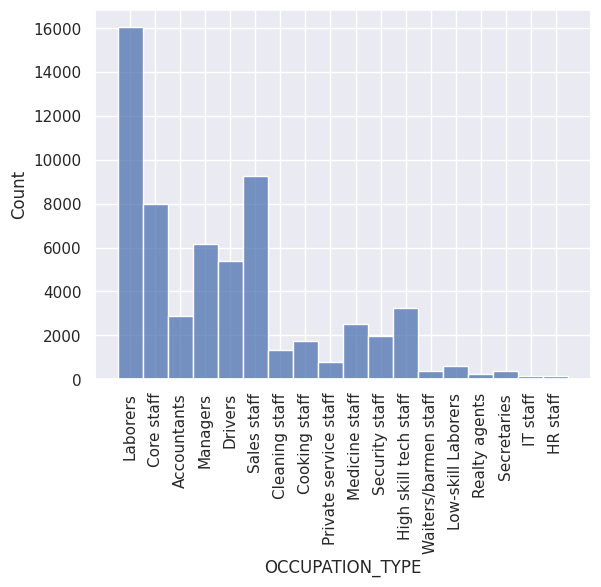

In [ ]:
sns.histplot(app_d.OCCUPATION_TYPE);
plt.xticks(rotation=90);

In [ ]:
# we will be replace with Laborers becaues it's frequecy is high
app_d.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [ ]:
app_d.OCCUPATION_TYPE.fillna(app_d.OCCUPATION_TYPE.mode()[0], inplace = True )

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
NAME_TYPE_SUITE                0.412385
AMT_GOODS_PRICE                0.086287
AMT_ANNUITY                    0.006724
DAYS_LAST_PHONE_CHANGE         0.002241
CNT_FAM_MEMBERS                0.001121
dtype: float64

 Now checking with missing value below the 1%

In [ ]:
app_d.NAME_TYPE_SUITE.describe()

count             88869
unique                7
top       Unaccompanied
freq              72103
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
app_d.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
app_d.NAME_TYPE_SUITE.value_counts()

Unaccompanied      72103
Family             11681
Spouse, partner     3308
Children             956
Other_B              497
Other_A              252
Group of people       72
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
app_d.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [ ]:
app_d.NAME_TYPE_SUITE.fillna(app_d.NAME_TYPE_SUITE.mode()[0], inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_GOODS_PRICE                0.086287
AMT_ANNUITY                    0.006724
DAYS_LAST_PHONE_CHANGE         0.002241
CNT_FAM_MEMBERS                0.001121
dtype: float64

In [ ]:
app_d.AMT_GOODS_PRICE.describe()

count    8.916000e+04
mean     5.381043e+05
std      3.691735e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

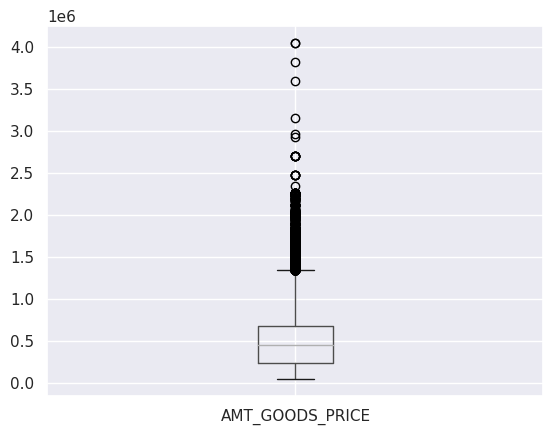

In [ ]:
app_d.boxplot(column = "AMT_GOODS_PRICE");

since we have checked our AMT_GOODS_PRICE, and we found here outliers too so we treat with missing value by median

In [ ]:
app_d.AMT_GOODS_PRICE.fillna(app_d.AMT_GOODS_PRICE.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
AMT_ANNUITY                    0.006724
DAYS_LAST_PHONE_CHANGE         0.002241
CNT_FAM_MEMBERS                0.001121
dtype: float64

In [ ]:
app_d.AMT_ANNUITY.describe()

count     89231.000000
mean      27066.818578
std       14441.748685
min        1980.000000
25%       16456.500000
50%       24903.000000
75%       34587.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
app_d.boxplot(column = "AMT_ANNUITY");

We need to AMT_ANNUITY missing value treat with median

In [ ]:
app_d.AMT_ANNUITY.fillna(app_d.AMT_ANNUITY.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
DAYS_LAST_PHONE_CHANGE         0.002241
CNT_FAM_MEMBERS                0.001121
dtype: float64

In [ ]:
app_d.CNT_FAM_MEMBERS.describe()

count    89236.000000
mean         2.154736
std          0.909125
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: CNT_FAM_MEMBERS, dtype: float64

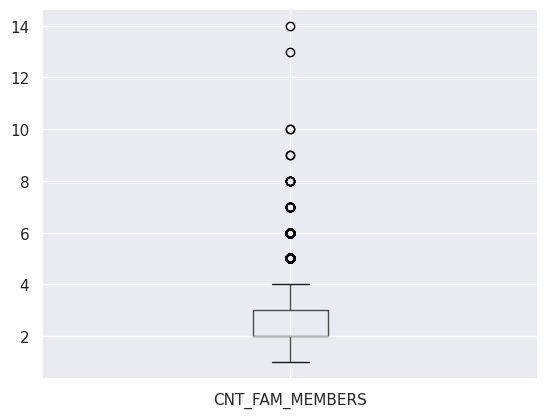

In [ ]:
app_d.boxplot(column="CNT_FAM_MEMBERS");

we need to replace missing value by median

In [ ]:
app_d.CNT_FAM_MEMBERS.fillna(app_d.CNT_FAM_MEMBERS.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
DAYS_LAST_PHONE_CHANGE         0.002241
dtype: float64

In [ ]:
app_d.DAYS_LAST_PHONE_CHANGE.describe()

count    89235.000000
mean      -962.077671
std        828.589286
min      -4078.000000
25%      -1570.000000
50%       -754.000000
75%       -270.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

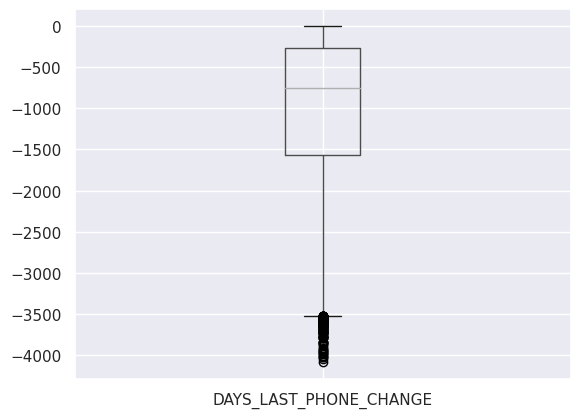

In [ ]:
app_d.boxplot(column = "DAYS_LAST_PHONE_CHANGE");

In [ ]:
app_d.DAYS_LAST_PHONE_CHANGE.fillna(app_d.DAYS_LAST_PHONE_CHANGE.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.406995
AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
dtype: float64

Now above 13% missing value

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    77273.000000
mean         1.893262
std          1.876291
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

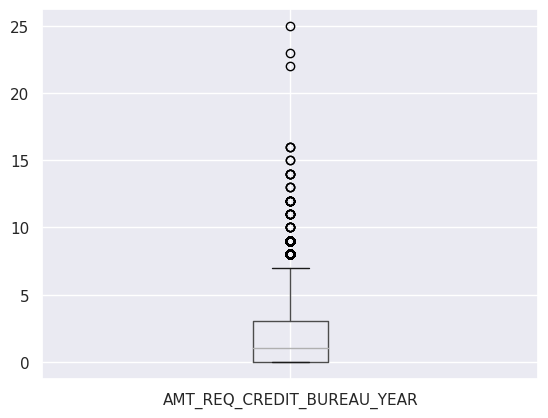

In [ ]:
app_d.boxplot(column = "AMT_REQ_CREDIT_BUREAU_YEAR");

In [ ]:
##Outliers found in this column at the maximum point of 25##


In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_d.AMT_REQ_CREDIT_BUREAU_YEAR.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_QRT     13.406995
AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
dtype: float64

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    77273.000000
mean         0.266108
std          0.614251
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

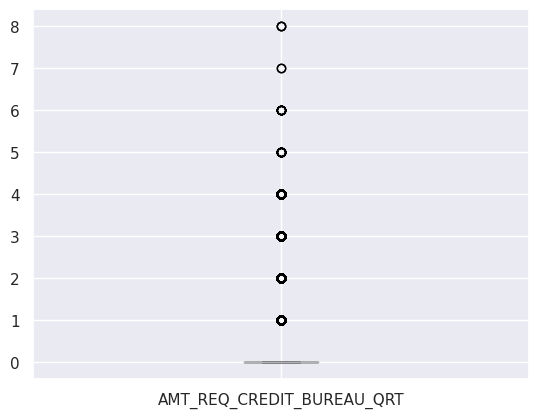

In [ ]:
app_d.boxplot(column = "AMT_REQ_CREDIT_BUREAU_QRT");

In [ ]:
## outliers found in this column at a maximum point of 8 ##


In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_d.AMT_REQ_CREDIT_BUREAU_QRT.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_MON     13.406995
AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
dtype: float64

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    77273.000000
mean         0.269486
std          0.923574
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

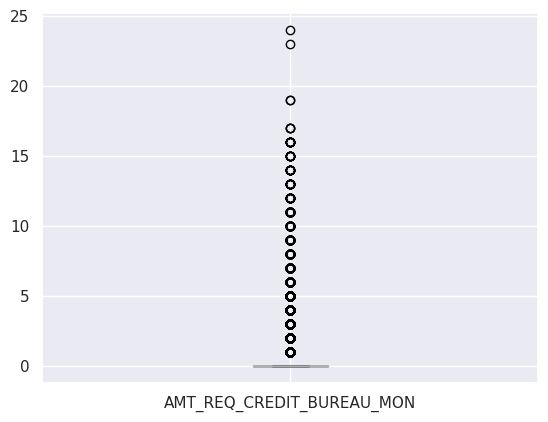

In [ ]:
app_d.boxplot(column = "AMT_REQ_CREDIT_BUREAU_MON");

In [ ]:
## Outlier found in this column at a maximum point of 25##


In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_d.AMT_REQ_CREDIT_BUREAU_MON.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_DAY     13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
dtype: float64

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    77273.000000
mean         0.033556
std          0.202224
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

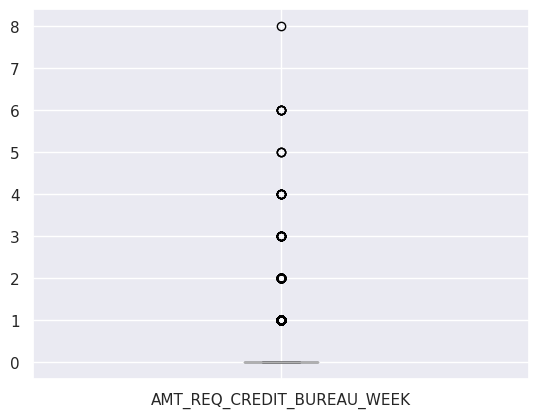

In [ ]:
app_d.boxplot(column = "AMT_REQ_CREDIT_BUREAU_WEEK");

In [ ]:
## Outliers found in this column at a maximum value of 25##

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_d.AMT_REQ_CREDIT_BUREAU_DAY.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
AMT_REQ_CREDIT_BUREAU_HOUR    13.406995
dtype: float64

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    89237.000000
mean         0.006242
std          0.098371
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

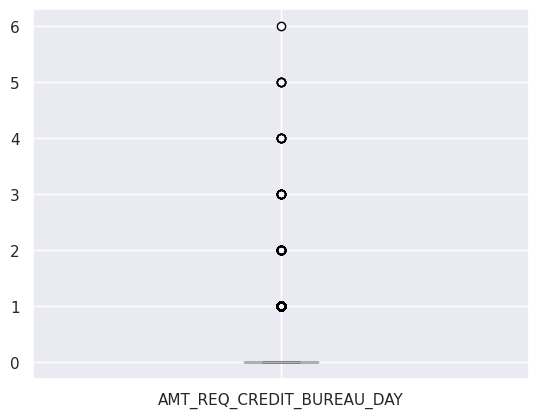

In [ ]:
app_d.boxplot(column = "AMT_REQ_CREDIT_BUREAU_DAY");

In [ ]:
## Outlier found in this column at a maximum point of 6##


In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_d.AMT_REQ_CREDIT_BUREAU_HOUR.median(), inplace = True)

In [ ]:
new_null = (app_d.isnull().mean()*100).sort_values(ascending=False)
new_null[new_null>0]

AMT_REQ_CREDIT_BUREAU_WEEK    13.406995
dtype: float64

In [ ]:
app_d.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    89237.000000
mean         0.005715
std          0.079436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
app_d.boxplot(column = "AMT_REQ_CREDIT_BUREAU_HOUR");

In [ ]:
## Outlier found in this column at a maximum point of 3##

In [ ]:
app_d.DAYS_ID_PUBLISH.describe()

count    89237.000000
mean     -2994.476843
std       1510.175338
min      -6265.000000
25%      -4297.000000
50%      -3259.000000
75%      -1718.000000
max          0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In Days we have seen maximum negative column we need to convert into positive

In [ ]:
app_d[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']]= abs(app_d[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']])

In [ ]:
app_d[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']]   

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION
0            9461            637             2120             3648.0
1           16765           1188              291             1186.0
2           19046            225             2531             4260.0
3           19005           3039             2437             9833.0
4           19932           3038             3458             4311.0
...           ...            ...              ...                ...
89232       14309           1359             4477              445.0
89233       23198         365243             4437            15282.0
89234       13504           6058             4203             6055.0
89235       15319            664             4642             1522.0
89236       14048           2026             4570             1951.0

[89237 rows x 4 columns]

In [ ]:
app_d[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']]   

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION
0            9461            637             2120             3648.0
1           16765           1188              291             1186.0
2           19046            225             2531             4260.0
3           19005           3039             2437             9833.0
4           19932           3038             3458             4311.0
...           ...            ...              ...                ...
89232       14309           1359             4477              445.0
89233       23198         365243             4437            15282.0
89234       13504           6058             4203             6055.0
89235       15319            664             4642             1522.0
89236       14048           2026             4570             1951.0

[89237 rows x 4 columns]

In [ ]:
app_d["YEAR_OF_BIRTH"]=app_d.DAYS_BIRTH / 365
app_d["YEAR_EMPLOYED"]=app_d.DAYS_EMPLOYED / 365
app_d["YEAR_OF_ID_PUBLISH"]=app_d.DAYS_ID_PUBLISH	 / 365
app_d["YEAR_OF_DAYS_REGISTRATION"]=app_d.DAYS_REGISTRATION / 365

In [ ]:
app_d[["YEAR_OF_BIRTH","YEAR_EMPLOYED","YEAR_OF_ID_PUBLISH","YEAR_OF_DAYS_REGISTRATION"]]

YEAR_OF_BIRTH  YEAR_EMPLOYED  YEAR_OF_ID_PUBLISH  \
0          25.920548       1.745205            5.808219   
1          45.931507       3.254795            0.797260   
2          52.180822       0.616438            6.934247   
3          52.068493       8.326027            6.676712   
4          54.608219       8.323288            9.473973   
...              ...            ...                 ...   
89232      39.202740       3.723288           12.265753   
89233      63.556164    1000.665753           12.156164   
89234      36.997260      16.597260           11.515068   
89235      41.969863       1.819178           12.717808   
89236      38.487671       5.550685           12.520548   

       YEAR_OF_DAYS_REGISTRATION  
0                       9.994521  
1                       3.249315  
2                      11.671233  
3                      26.939726  
4                      11.810959  
...                          ...  
89232                   1.219178  
89233                  41.868493  
89234                  16.589041  
89235                   4.169863  
89236                   5.345205  

[89237 rows x 4 columns]

In [ ]:
drop_days=["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","DAYS_REGISTRATION"]

In [ ]:
app_d.drop(drop_days,axis=1,inplace=True)

In [ ]:
app_d.shape

(89237, 39)

In [ ]:
app_d.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_OF_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_OF_ID_PUBLISH', 'YEAR_OF_DAYS_REGISTRATION'],
     

In [ ]:
app_d["CODE_GENDER"].replace("XNA","F",inplace=True)

In [ ]:
app_d.CODE_GENDER.value_counts()  

F    58779
M    30458
Name: CODE_GENDER, dtype: int64

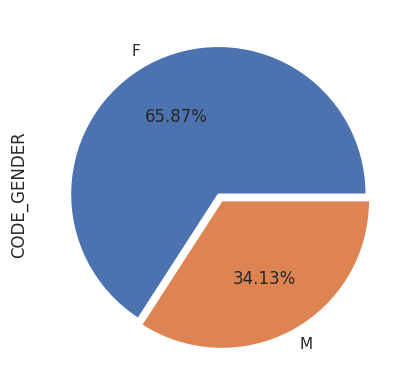

In [ ]:
app_d["CODE_GENDER"].value_counts().plot.pie(autopct= '%2.2f%%' , explode=[0,0.05]);

In [ ]:
## female candidates are exponentially high as compared to others ##


<Axes: >

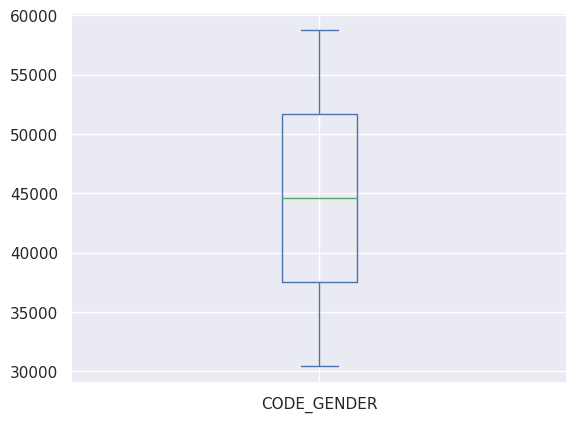

In [ ]:
app_d["CODE_GENDER"].value_counts().plot.box()

In [ ]:
## for code gender no outlier found in this data ##


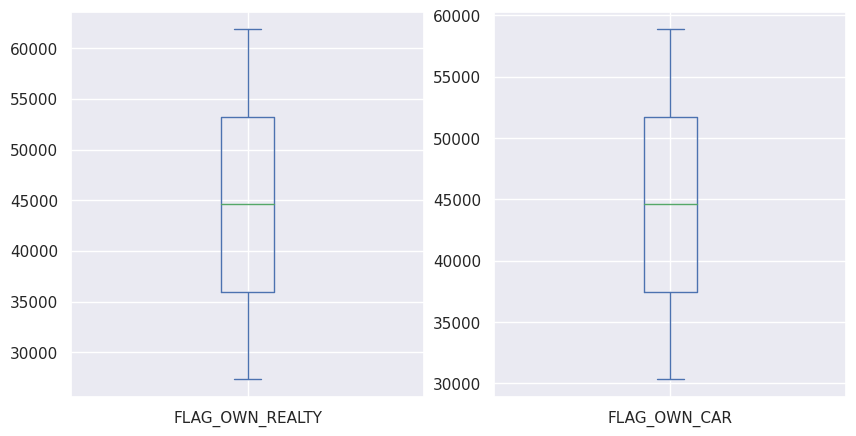

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
app_d["FLAG_OWN_REALTY"].value_counts().plot.box();
plt.subplot(1,2,2)
app_d["FLAG_OWN_CAR"].value_counts().plot.box();



## observation: since no outliers therefore the data is file


In [ ]:
# exploring CNT_children


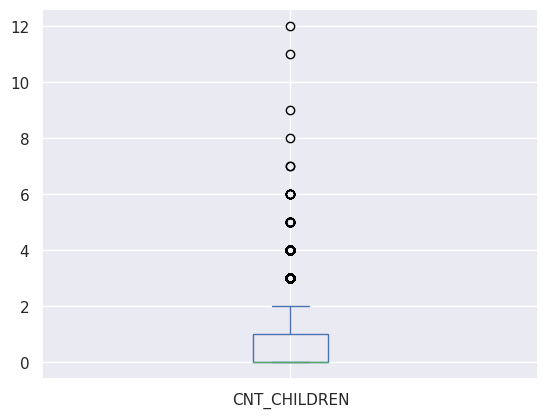

In [ ]:
app_d["CNT_CHILDREN"].plot.box();

## observation : outliers are found after 12.5

In [ ]:
app_d["CNT_CHILDREN"]>2.5   

0        False
1        False
2        False
3        False
4        False
         ...  
89232    False
89233    False
89234    False
89235    False
89236    False
Name: CNT_CHILDREN, Length: 89237, dtype: bool

In [ ]:
app_d.CNT_CHILDREN.describe()

count    89237.000000
mean         0.416699
std          0.721152
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         12.000000
Name: CNT_CHILDREN, dtype: float64

In [ ]:
app_d[app_d["CNT_CHILDREN"]<15].CNT_CHILDREN  

0        0
1        0
2        0
3        0
4        0
        ..
89232    1
89233    0
89234    0
89235    2
89236    1
Name: CNT_CHILDREN, Length: 89237, dtype: int64

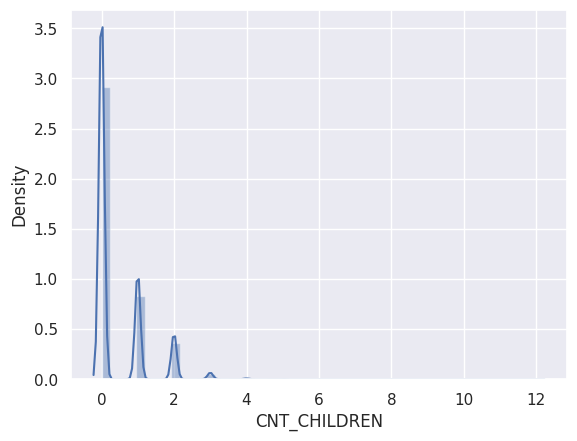

In [ ]:
sns.distplot(app_d[app_d["CNT_CHILDREN"]<15].CNT_CHILDREN);


In [ ]:
#UPPER= Q3+1.5*IQR
#lower=Q1-1.5*IQR
#Q3:- 75%TILE 
#Q1:- 25%TILE
#IQR=Q3-Q1
upper_bound=1.00+(1.5*0)
lower_bound=0+(1.5*0)
print(upper_bound)
print(lower_bound)

1.0
0.0


In [ ]:
app_d["CNT_CHILDREN"].skew()  

1.8757177851919367

In [ ]:
## As per the data it is highly Skwed

<Axes: >

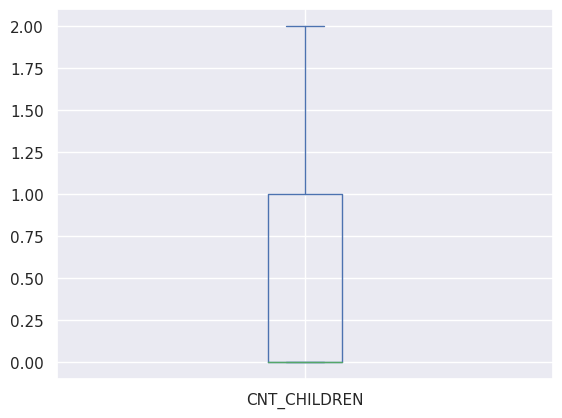

In [ ]:
app_d[app_d["CNT_CHILDREN"]< 3].CNT_CHILDREN.plot.box()    

## observation: If I set maximum to three children no outliers were found

In [ ]:
## Exploring the data AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY',

In [ ]:
app_d.AMT_INCOME_TOTAL.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count    8.923700e+04
mean     1.694528e+05
std      4.045315e+05
min      2.565000e+04
10%      8.100000e+04
20%      9.900000e+04
30%      1.125000e+05
40%      1.350000e+05
50%      1.440000e+05
60%      1.620000e+05
70%      1.800000e+05
80%      2.250000e+05
90%      2.700000e+05
99%      4.694485e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x="AMT_INCOME_TOTAL",data=app_d)
#app_d.AMT_INCOME_TOTAL.plot.box();
plt.xscale("log")
plt.title('INCOME_RANGE')


Text(0.5, 1.0, 'INCOME_RANGE')

In [ ]:
app_d.AMT_INCOME_TOTAL.quantile([0.75,0.80,0.90,0.99])

0.75    202500.00
0.80    225000.00
0.90    270000.00
0.99    469448.46
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
app_d[app_d["AMT_INCOME_TOTAL"] < app_d.AMT_INCOME_TOTAL.quantile(0.90)].AMT_INCOME_TOTAL

0        202500.0
2         67500.0
3        135000.0
4        121500.0
5         99000.0
           ...   
89232    135000.0
89233    112500.0
89234    225000.0
89235    247500.0
89236    135000.0
Name: AMT_INCOME_TOTAL, Length: 78254, dtype: float64

In [ ]:
sns.distplot(app_d[app_d["AMT_INCOME_TOTAL"]< app_d["AMT_INCOME_TOTAL"].quantile(0.90)].AMT_INCOME_TOTAL) 

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

Text(0.5, 1.0, 'INCOME_RANGE')

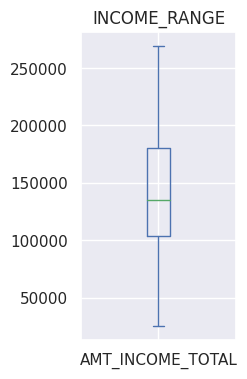

In [ ]:
plt.figure(figsize=(2,4))
app_d[app_d["AMT_INCOME_TOTAL"]< app_d["AMT_INCOME_TOTAL"].quantile(0.90)].AMT_INCOME_TOTAL.plot.box();
plt.title('INCOME_RANGE')


## observation: outliers were found above 90th percentile

In [ ]:
app_d["AMT_CREDIT"].describe(percentiles=[0.8,0.9,0.95,0.99])

count    8.923700e+04
mean     5.987953e+05
std      4.018051e+05
min      4.500000e+04
50%      5.124465e+05
80%      9.000000e+05
90%      1.133748e+06
95%      1.350000e+06
99%      1.832940e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [ ]:
app_d[app_d["AMT_CREDIT"] < app_d["AMT_CREDIT"].quantile(0.99)].AMT_CREDIT

0         406597.5
1        1293502.5
2         135000.0
3         312682.5
4         513000.0
           ...    
89232     247500.0
89233     270000.0
89234     568197.0
89235     871029.0
89236     316125.0
Name: AMT_CREDIT, Length: 88341, dtype: float64

<Axes: >

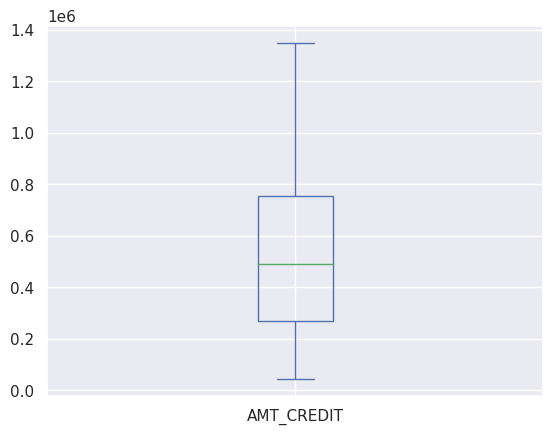

In [ ]:
app_d[app_d["AMT_CREDIT"]< app_d["AMT_CREDIT"].quantile(0.95)].AMT_CREDIT.plot.box()

## observation: outliers can be removed after setting the value upto 0.95 percentile 

In [ ]:
app_d["AMT_CREDIT"].describe(percentiles=[0.8,0.9,0.95,0.99])

count    8.923700e+04
mean     5.987953e+05
std      4.018051e+05
min      4.500000e+04
50%      5.124465e+05
80%      9.000000e+05
90%      1.133748e+06
95%      1.350000e+06
99%      1.832940e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE'>

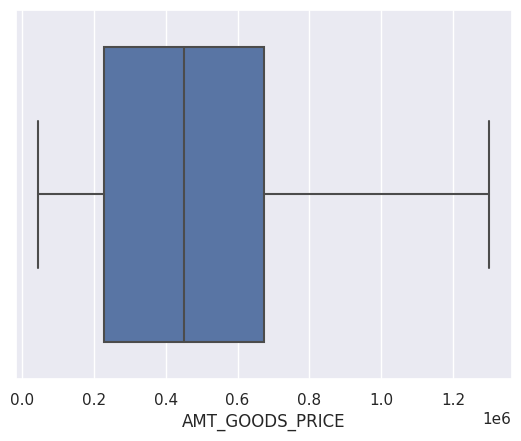

In [ ]:
sns.boxplot(x=app_d[app_d["AMT_GOODS_PRICE"] < app_d["AMT_GOODS_PRICE"].quantile(0.95)].AMT_GOODS_PRICE)

sns.boxplot(x=df[df["AMT_GOODS_PRICE"] < df["AMT_GOODS_PRICE"].quantile(0.95)].AMT_GOODS_PRICE)

In [ ]:
app_d["ORGANIZATION_TYPE"].value_counts()  

Business Entity Type 3    19722
XNA                       15965
Self-employed             11078
Other                      4833
Medicine                   3279
Business Entity Type 2     3059
Government                 3040
School                     2611
Trade: type 7              2221
Kindergarten               1967
Construction               1906
Business Entity Type 1     1738
Transport: type 4          1540
Industry: type 9            989
Security                    983
Trade: type 3               982
Industry: type 3            970
Housing                     870
Industry: type 11           832
Bank                        784
Military                    774
Agriculture                 687
Postal                      653
Police                      652
Transport: type 2           648
Security Ministries         602
Trade: type 2               561
Restaurant                  529
Services                    481
Industry: type 7            381
University                  377
Transpor

In [ ]:
app_d["ORGANIZATION_TYPE"].replace("XNA","UNKNOWN",inplace=True)

In [ ]:
app_d["ORGANIZATION_TYPE"]

0        Business Entity Type 3
1                        School
2                    Government
3        Business Entity Type 3
4                      Religion
                  ...          
89232                  Security
89233                   UNKNOWN
89234    Business Entity Type 2
89235    Business Entity Type 2
89236             Self-employed
Name: ORGANIZATION_TYPE, Length: 89237, dtype: object

In [ ]:
app_d["BUISNESS_TYPE"]=app_d["ORGANIZATION_TYPE"].apply(lambda x : x.split(" ")[0])

In [ ]:
plt.figure(figsize=(10,5))

app_d.BUISNESS_TYPE.value_counts().plot.bar()
plt.title('BUISNESS_TYPE')


Text(0.5, 1.0, 'BUISNESS_TYPE')

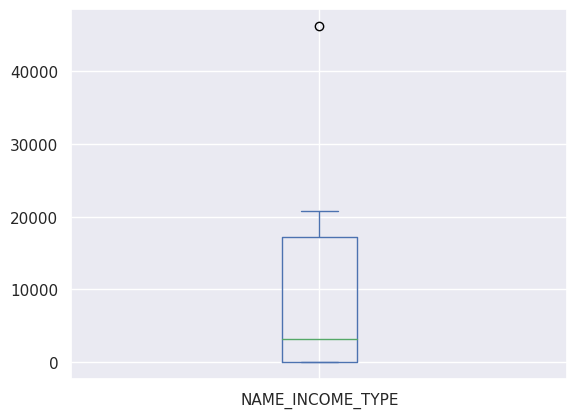

In [ ]:
app_d.NAME_INCOME_TYPE.value_counts().plot.box();         

## observation: Outliers identified which is at the max point


In [ ]:
app_d["NAME_EDUCATION_TYPE"].value_counts().plot.barh()

<Axes: >

## Observation:- Secondary Type of education are higest than other type of education.

In [ ]:
app_d["NAME_FAMILY_STATUS"].value_counts()


Married                 57122
Single / not married    12980
Civil marriage           8737
Separated                5682
Widow                    4715
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
app_d[app_d["NAME_FAMILY_STATUS"]=="Widow"]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
18         100022       0    Revolving loans           F            N   
26         100031       1         Cash loans           F            N   
59         100070       0         Cash loans           M            Y   
74         100086       0         Cash loans           F            N   
99         100118       0         Cash loans           F            N   
...           ...     ...                ...         ...          ...   
89207      203576       0         Cash loans           F            N   
89211      203580       0         Cash loans           F            N   
89212      203581       0         Cash loans           F            N   
89225      203596       0         Cash loans           F            N   
89236      203609       0         Cash loans           F            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
18                  Y             0          112500.0    157500.0   
26                  Y             0          112500.0    979992.0   
59                  Y             0          540000.0   1227901.5   
74                  Y             1          135000.0    675000.0   
99                  Y             0           90000.0    675000.0   
...               ...           ...               ...         ...   
89207               Y             0          173250.0    738567.0   
89211               Y             1          315000.0    720000.0   
89212               Y             0          112500.0     76410.0   
89225               Y             0          135000.0    540000.0   
89236               Y             1          135000.0    316125.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
18          7875.0         157500.0         Other_A               Working   
26         27076.5         702000.0   Unaccompanied               Working   
59         46899.0        1129500.0   Unaccompanied               Working   
74         21775.5         675000.0   Unaccompanied  Commercial associate   
99         26541.0         675000.0   Unaccompanied             Pensioner   
...            ...              ...             ...                   ...   
89207      23823.0         616500.0   Unaccompanied             Pensioner   
89211      48442.5         720000.0   Unaccompanied               Working   
89212       7573.5          67500.0   Unaccompanied             Pensioner   
89225      17977.5         540000.0   Unaccompanied             Pensioner   
89236      20331.0         261000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
18     Secondary / secondary special              Widow    House / apartment   
26     Secondary / secondary special              Widow    House / apartment   
59                  Higher education              Widow    House / apartment   
74                  Higher education              Widow    House / apartment   
99     Secondary / secondary special              Widow    House / apartment   
...                              ...                ...                  ...   
89207  Secondary / secondary special              Widow    House / apartment   
89211  Secondary / secondary special              Widow     Office apartment   
89212  Secondary / secondary special              Widow    House / apartment   
89225  Secondary / secondary special              Widow  Municipal apartment   
89236  Secondary / secondary special              Widow    House / apartment   

       REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
18                       0.046220        Laborers              1.0   
26                       0.018029   Cooking staff              1.0   
59                       0.032561        Managers              1.0   
74                       0.019101        Laborers              2.0   
99                       0.026392        Laborers              1.

<Axes: >

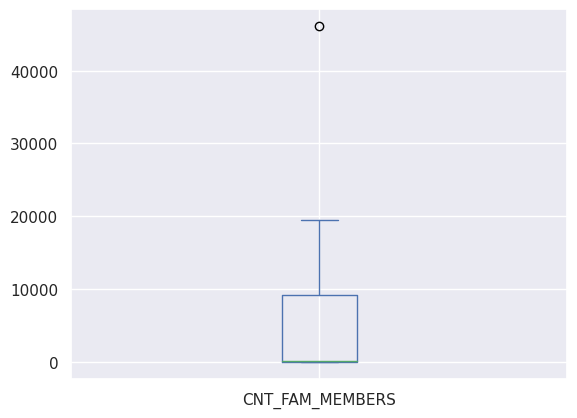

In [ ]:
app_d["CNT_FAM_MEMBERS"].value_counts().plot.box()

## Observation :- Few Outliers are found which at different points and maxium extends upto the 160000 



In [ ]:
app_d["CNT_FAM_MEMBERS"].describe()

count    89237.000000
mean         2.154734
std          0.909120
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
IQR=3.00-2.00
print("IQR: ",IQR)
UPPER_BOUND=3-(1.5*1)             #Q3+1.5*IQR
print("UPPER_BOUND:",UPPER_BOUND)
LOWER_BOUND=2-(1.5*1)             #Q3+1.5*IQR
print("LOWER_BOUND:",LOWER_BOUND)

IQR:  1.0
UPPER_BOUND: 1.5
LOWER_BOUND: 0.5


<Axes: >

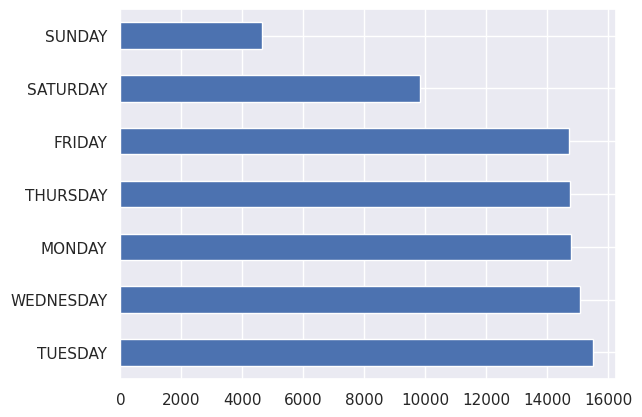

In [ ]:
app_d["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.barh()

In [ ]:
##Observation :- Tuesdays ,Wednesday and Monday are the time people are more apply for loan   ##


UNIVARIENT ANALYSIS

In [ ]:
app_d.TARGET.value_counts(normalize=True)*100

0    91.929357
1     8.070643
Name: TARGET, dtype: float64

In [ ]:
sns.countplot(data=app_d,x="TARGET")                       

<Axes: xlabel='TARGET', ylabel='count'>

In [ ]:
## IN THIS PLOT OF TARGET ANALYSIS IT IS IDENTIFIED THAT THERE ARE LESS DEFAULTERS

In [ ]:
app_d.NAME_CONTRACT_TYPE.value_counts()

Cash loans         80784
Revolving loans     8453
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
sns.countplot(data=app_d,x="NAME_CONTRACT_TYPE")  

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

## observation : cash loans are more in comparision of revolving loans

In [ ]:
sns.countplot(data=app_d,x="CODE_GENDER")

<Axes: xlabel='CODE_GENDER', ylabel='count'>

## observation: Number of females taking loans is more than number of males taking loans##

Text(0.5, 0, 'AMT_ANNUITY')

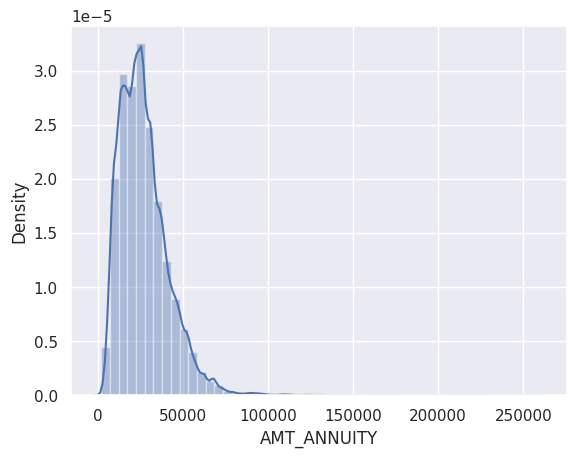

In [ ]:
sns.distplot(x=app_d["AMT_ANNUITY"])
plt.xlabel("AMT_ANNUITY")

In [ ]:
app_d["AMT_ANNUITY"].skew()

1.5342208866688287

In [ ]:
app_d["AMT_ANNUITY"].describe()

count     89237.000000
mean      27066.673090
std       14441.274063
min        1980.000000
25%       16456.500000
50%       24903.000000
75%       34587.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
##Observation :- The AMT_ANNUITY the max Density is approx 25000##


<Axes: >

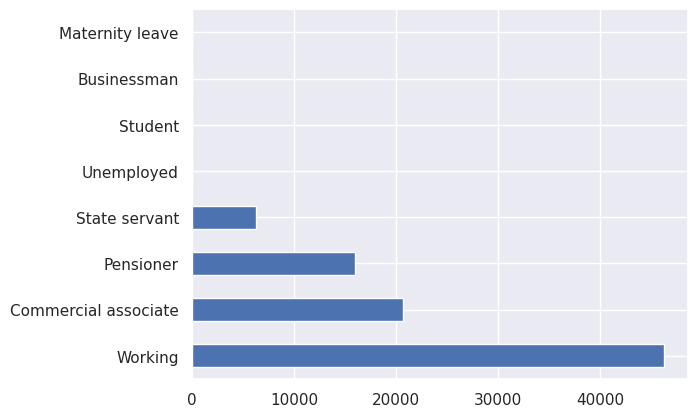

In [ ]:
app_d["NAME_INCOME_TYPE"].value_counts().plot.barh()

## Observation : - Working category has more income than any other type of income

<Axes: >

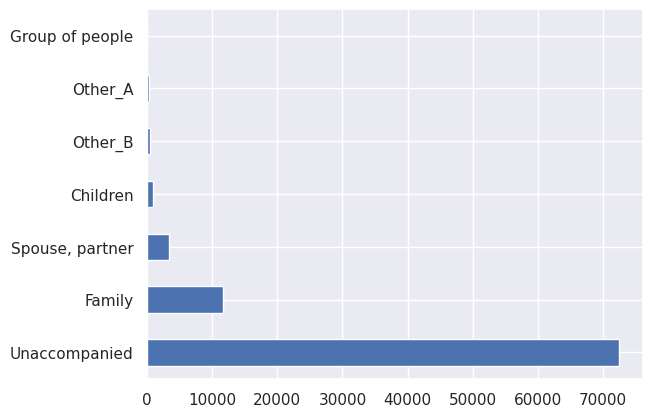

In [ ]:
app_d["NAME_TYPE_SUITE"].value_counts().plot.barh()

In [ ]:
app_d['NAME_EDUCATION_TYPE'].value_counts().plot.barh()         

<Axes: >

##Observation :- People with higher secondary school are more in comparison to others##

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.distplot(app_d["AMT_GOODS_PRICE"])

plt.subplot(1,3,2)

sns.distplot(app_d["AMT_ANNUITY"])
plt.subplot(1,3,3)

sns.distplot(app_d["AMT_CREDIT"]);



In [ ]:
print(app_d["AMT_CREDIT"].skew())
print(app_d["AMT_ANNUITY"].skew())
print(app_d["AMT_GOODS_PRICE"].skew())

1.2076681727943241
1.5342208866688287
1.3291059640841953


In [ ]:
app_d.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_OF_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_OF_ID_PUBLISH', 'YEAR_OF_DAYS_REGISTRATION', 'BUISN

<Axes: xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

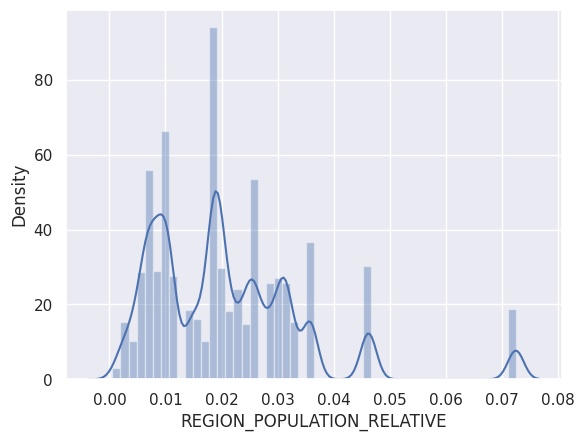

In [ ]:
sns.distplot(app_d["REGION_POPULATION_RELATIVE"])


In [ ]:
app_d.BUISNESS_TYPE.describe()

count        89237
unique          34
top       Business
freq         24519
Name: BUISNESS_TYPE, dtype: object

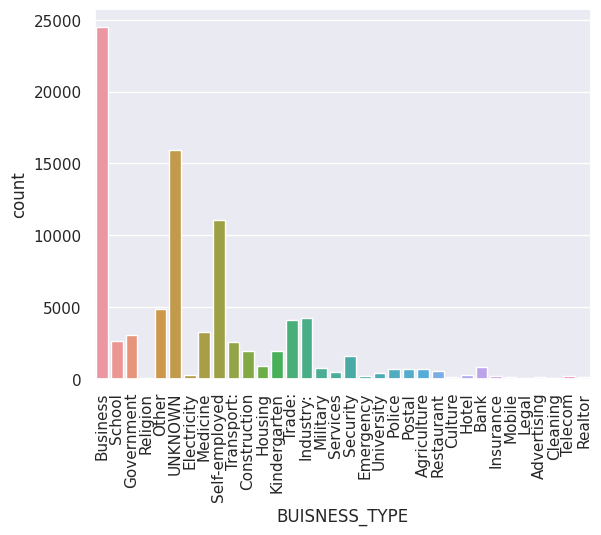

In [ ]:
sns.countplot(data = app_d , x="BUISNESS_TYPE")
plt.xticks(rotation=90);

Observation :- Buisness , Unknown and Self-Emoloyed are the top most occupation 

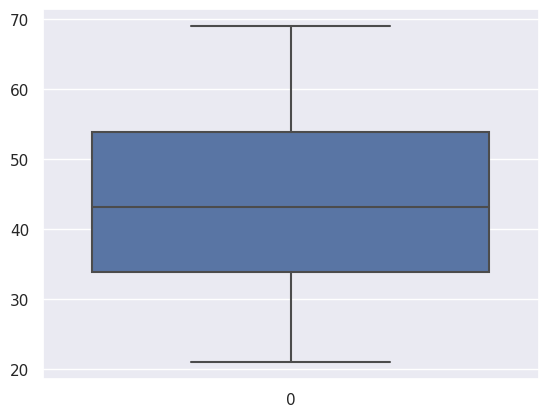

In [ ]:
# Year_ of _ Birth 
sns.boxplot(app_d["YEAR_OF_BIRTH"]);  
# No outliers found in this data  

In [ ]:
app_d["WEEKDAY_APPR_PROCESS_START"]

0        WEDNESDAY
1           MONDAY
2           MONDAY
3        WEDNESDAY
4         THURSDAY
           ...    
89232     SATURDAY
89233      TUESDAY
89234       FRIDAY
89235       FRIDAY
89236      TUESDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 89237, dtype: object

# BIVARIANT ANALYSIS 

In [ ]:
 set(app_d.describe().columns)

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_POPULATION_RELATIVE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'SK_ID_CURR',
 'TARGET',
 'YEAR_EMPLOYED',
 'YEAR_OF_BIRTH',
 'YEAR_OF_DAYS_REGISTRATION',
 'YEAR_OF_ID_PUBLISH'}

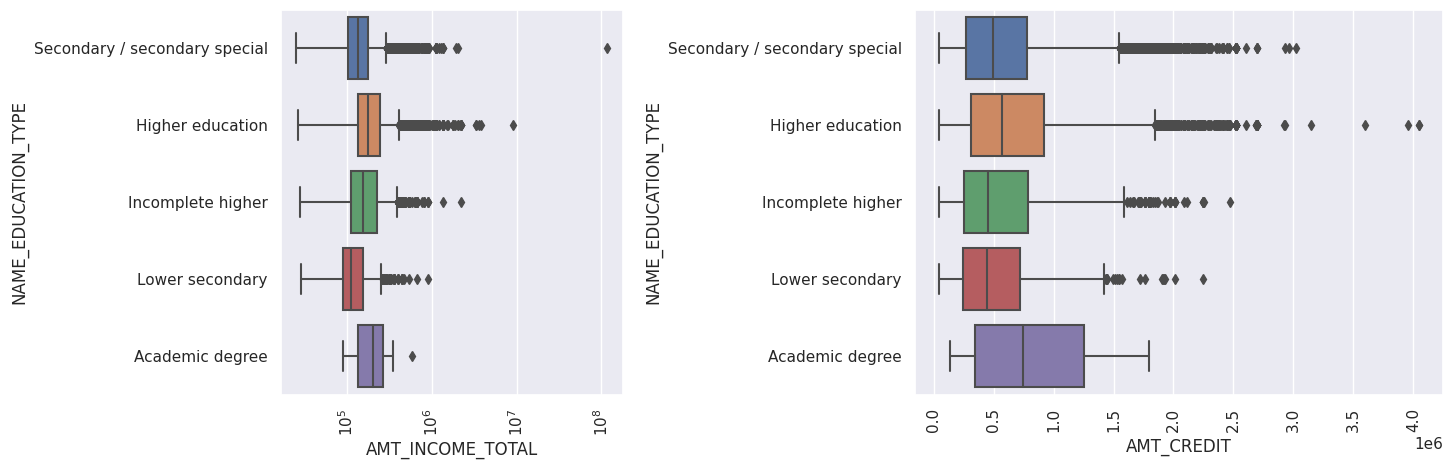

In [ ]:
# NAME_EDUCATION_TYPE vs "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="AMT_INCOME_TOTAL",y="NAME_EDUCATION_TYPE",data=app_d)
plt.xscale("log")
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.boxplot(x="AMT_CREDIT",y="NAME_EDUCATION_TYPE",data=app_d)
plt.xticks(rotation=90);


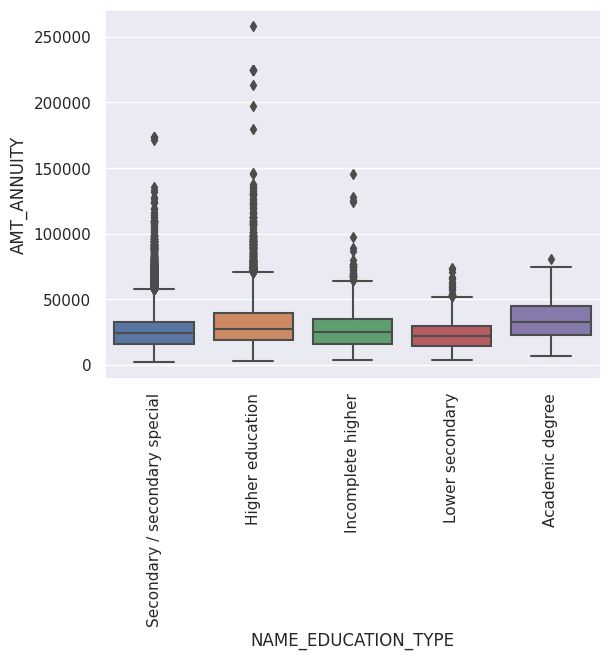

In [ ]:
sns.boxplot(data=app_d, x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY")
plt.xticks(rotation=90);

### Here is seen that the people with Academic degree have more income as compare to other

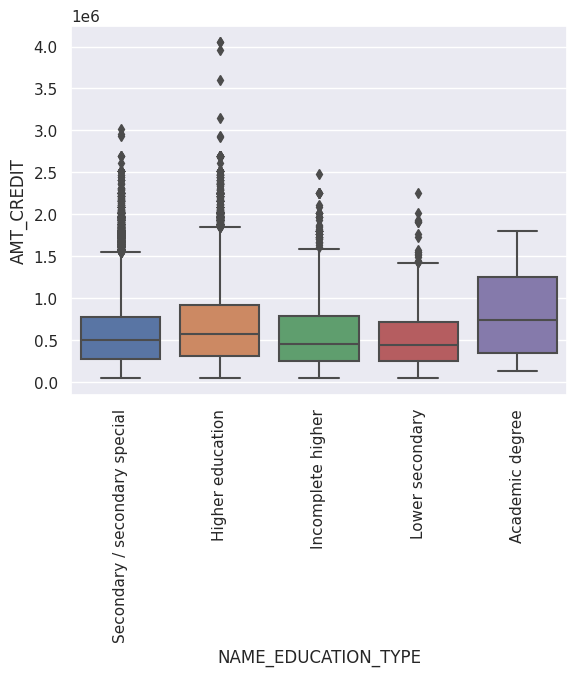

In [ ]:
sns.boxplot(data=app_d, x="NAME_EDUCATION_TYPE",y="AMT_CREDIT")
plt.xticks(rotation=90);

Observation:- Same as AMT_ANNUITY here also AMT_CREDIT is high for Academic degree

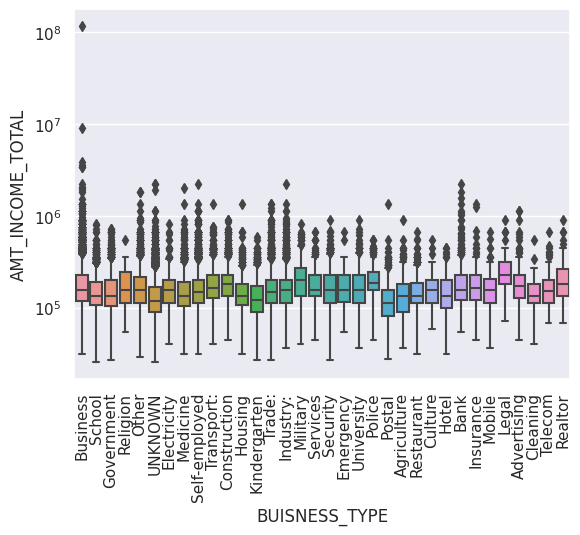

In [ ]:
# AMT_INCOME_TOTAL vs Buisness_type
sns.boxplot(data = app_d , x="BUISNESS_TYPE",y="AMT_INCOME_TOTAL")
plt.yscale("log")
plt.xticks(rotation=90);

observation: - Buisness, religion, construction ,military,legal are few occupation with high income range 

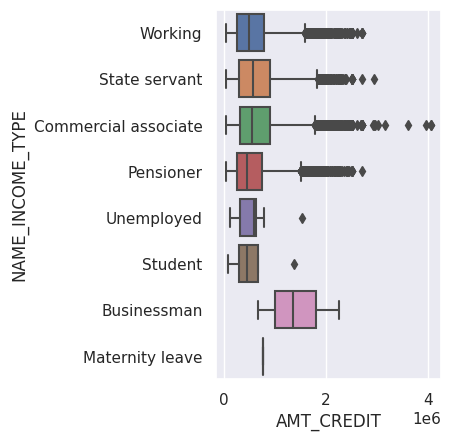

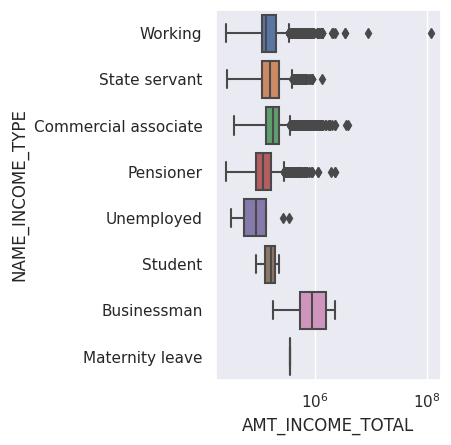

In [ ]:
#NAME_INCOME_TYPE & AMT_CREDIT & AMT_INCOME_TOTAL
plt.subplot(1,2,1)
sns.boxplot(data=app_d, y ="NAME_INCOME_TYPE", x= "AMT_CREDIT")
plt.show()
plt.subplot(1,2,2)
sns.boxplot(data=app_d, y ="NAME_INCOME_TYPE", x= "AMT_INCOME_TOTAL")
plt.xscale("log")
plt.show()

### Observation :- Clearly the buisness Income type is dominaing the other buisness types with working which as a verity of range,

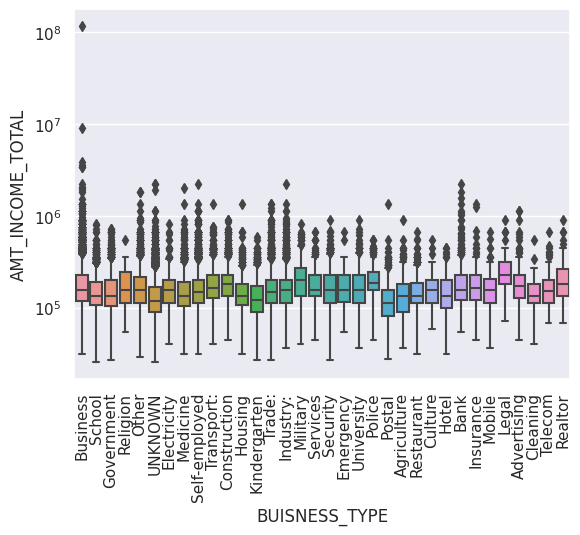

In [ ]:
# AMT_INCOME_TOTAL vs Buisness_type
sns.boxplot(data=app_d, x="BUISNESS_TYPE",y="AMT_INCOME_TOTAL");
plt.yscale("log");
plt.xticks(rotation=90);

In [ ]:
app_d.CODE_GENDER.value_counts()

F    58779
M    30458
Name: CODE_GENDER, dtype: int64

<Axes: xlabel='TARGET', ylabel='count'>

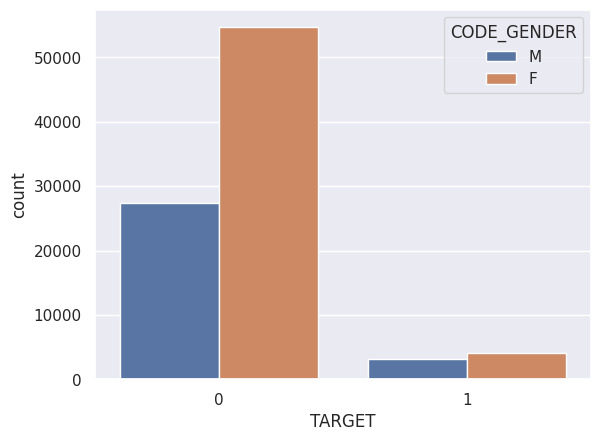

In [ ]:
sns.countplot(data = app_d, x="TARGET",hue="CODE_GENDER")    #

Observation:- Female applicants are more as compared to male

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=app_d, x="BUISNESS_TYPE",hue="TARGET")
plt.xticks(rotation=90);

### Observation:  Business types are the best target customer followed by Unknown and Self- Employed  

In [ ]:
sns.countplot(x="NAME_FAMILY_STATUS",data=app_d,hue="TARGET")
plt.xticks(rotation=90);

### Observation :  Married and single are top 2 category to target which has highest no. of non defaulters

In [ ]:
sns.countplot(x="NAME_CONTRACT_TYPE",data=app_d,hue="TARGET");

### Observstion:- Cash loans have more non defaulters tahn revaloving loans




In [ ]:
sns.countplot(x="NAME_TYPE_SUITE",data=app_d,hue="TARGET")
plt.xticks(rotation=90);

### Observation :- Unaccompained and family are the people who are less defaulters than other category 

In [ ]:
app_d["YEAR_OF_BIRTH"].describe()

count    89237.000000
mean        43.926101
std         11.971196
min         21.030137
25%         33.928767
50%         43.167123
75%         53.906849
max         69.043836
Name: YEAR_OF_BIRTH, dtype: float64

In [ ]:
bins = [0,20,40,60,80] 
slot = ["0-20", "20-40", "40-60", "60-80"] 
app_d['Age_Range']=pd.cut(app_d['YEAR_OF_BIRTH'],bins,labels=slot,ordered=False)

In [ ]:
app_d[["Age_Range", "YEAR_OF_BIRTH"]]

Age_Range  YEAR_OF_BIRTH
0         20-40      25.920548
1         40-60      45.931507
2         40-60      52.180822
3         40-60      52.068493
4         40-60      54.608219
...         ...            ...
89232     20-40      39.202740
89233     60-80      63.556164
89234     20-40      36.997260
89235     40-60      41.969863
89236     20-40      38.487671

[89237 rows x 2 columns]

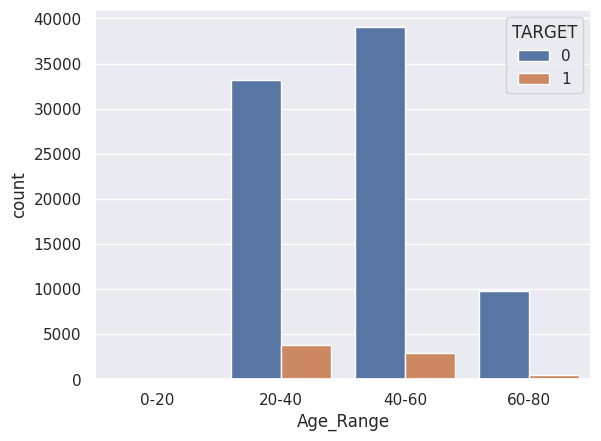

In [ ]:
sns.countplot(x="Age_Range",data=app_d,hue="TARGET");


In [ ]:
sns.boxplot(x="Age_Range",data=app_d,y="AMT_INCOME_TOTAL")
plt.yscale("log")

### Observation :- The Age Range form 20-60 have nearly same income.

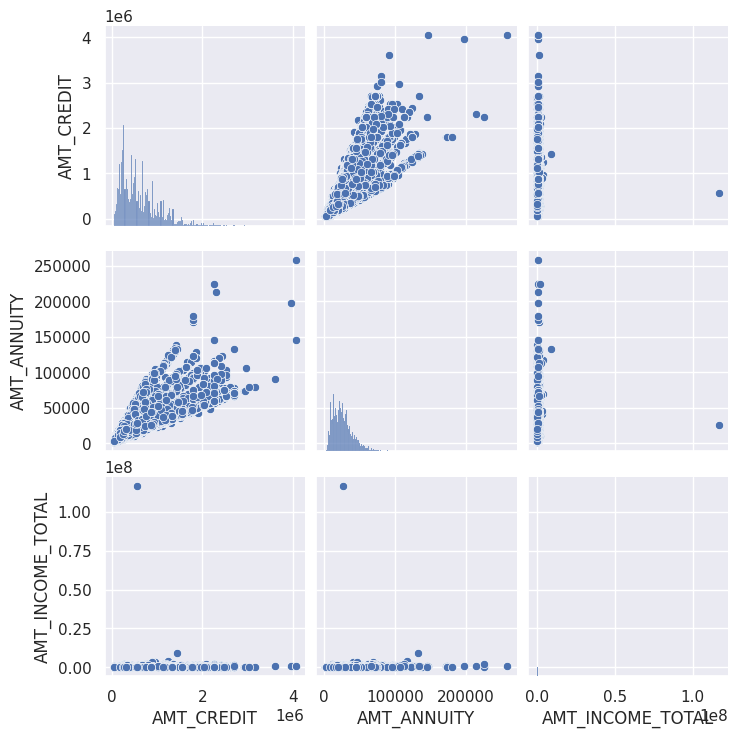

In [ ]:
sns.pairplot(data=app_d , vars= ["AMT_CREDIT" ,"AMT_ANNUITY", "AMT_INCOME_TOTAL"])


### Observation :- 
#### 1) AMT_CREDIT and AMT_ANNUITY are directly proportional to each other 
#### 2) AMT_INCOME_TOTAL AND AMT_ANNUITY AND AMT_CREDIT there is not much difference in each chart 

# SEGMENTED VARIABLE 

## DATA IMBALANCE 

In [ ]:
app_d["TARGET"].value_counts(normalize=True)*100

0    91.929357
1     8.070643
Name: TARGET, dtype: float64

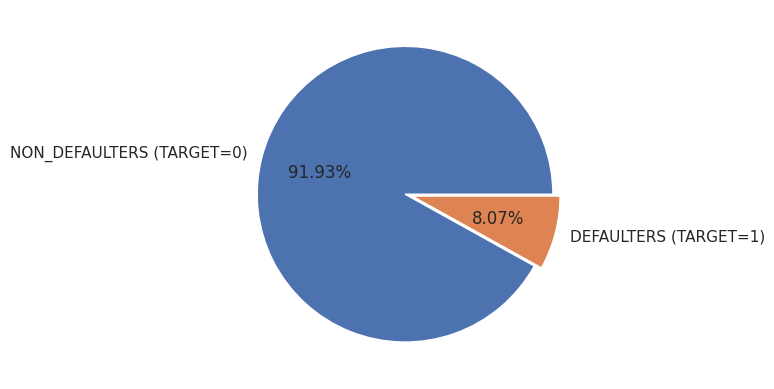

In [ ]:
plt.pie(app_d['TARGET'].value_counts(),labels=['NON_DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'], autopct= '%2.2f%%' , explode=[0,0.05]);

Observation :- As you can see there is a huge difference in the data

In [ ]:
NON_DEFAULTERS=app_d[app_d["TARGET"]==0]

In [ ]:
DEFAULTERS=app_d[app_d["TARGET"]==1]

In [ ]:
NON_DEFAULTERS.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                    0.003541      Core staff              2.0   
2                    0.010032        Laborers              1.0   
3                    0.008019        Laborers              2.0   
4                    0.028663      Core staff              1.0   
5                    0.035792        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                       0                        0                   Other   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1                  -828.0                         0.0   
2                  -815.0                         0.0   
3                  -617.0                         0.0   
4                 -1106.0                         0.0   
5                 -2536.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU

In [ ]:
DEFAULTERS.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                     0.018801        Laborers              1.0   
26                    0.018029   Cooking staff              1.0   
40                    0.025164        Laborers              2.0   
42                    0.007305     Sales staff              2.0   
81                    0.028663        Laborers              2.0   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
81                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0                        0  Business Entity Type 3   
42                       0                        0           Self-employed   
81                       0                        0                 UNKNOWN   

    DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  -1134.0                         0.0   
26                  -161.0                         0.0   
40                 -1075.0                         0.0   
42                 -1480.0                         0.0   
81                     0.0 

Text(0.5, 1.0, 'Defaulters')

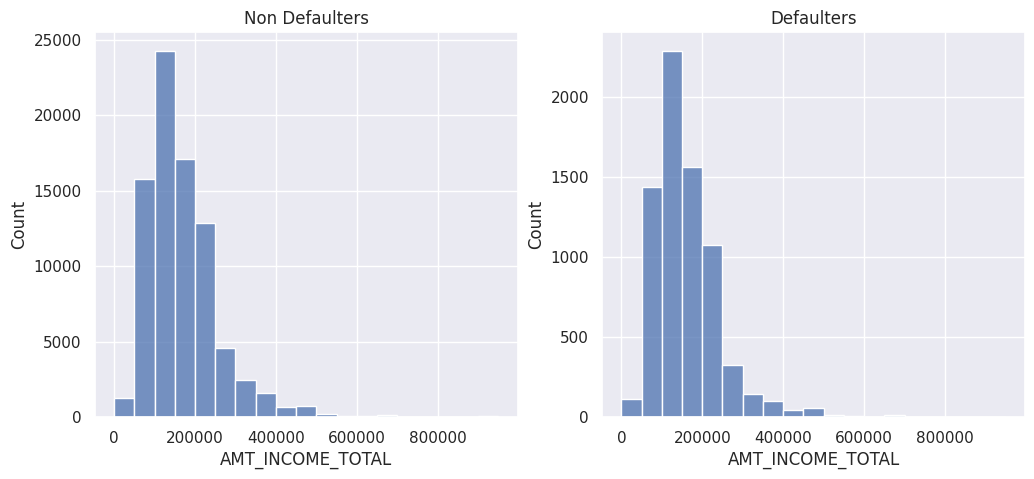

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
bins=[i for i in range( 0, 1000000, 50000)]
sns.histplot(NON_DEFAULTERS["AMT_INCOME_TOTAL"], bins=bins)
plt.title('Non Defaulters')

plt.subplot(1,2,2)
bins=[i for i in range( 0, 1000000, 50000)]
sns.histplot(DEFAULTERS["AMT_INCOME_TOTAL"], bins=bins)
plt.title('Defaulters')

## CONLUSION:- NOT MUCH DIFFERENCE IS FOUND IN THE TWO DATA THE INCOME IS MAXIMUM FOR BOTH THE TARGET VARIABLES AS 100000##

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data = NON_DEFAULTERS , x = "NAME_EDUCATION_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data = DEFAULTERS , x = "NAME_EDUCATION_TYPE")
plt.xticks(rotation=90);
plt.title(' Defaulters');


## Observation :- TOP 3 non defaulters and non defaluters fall under the same buisness type Buisness , Self Employed and Unknown##

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data = NON_DEFAULTERS, x = "NAME_CONTRACT_TYPE")
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data = DEFAULTERS, x = "NAME_CONTRACT_TYPE")
plt.title('Non Defaulters');


Text(0.5, 1.0, 'Non Defaulters')

## CONCUSION :- CASH LOANS ARE MORE IN IN BOTH THE CASES DEFAULTERS AS WELL AS NON DEFAULTERS##

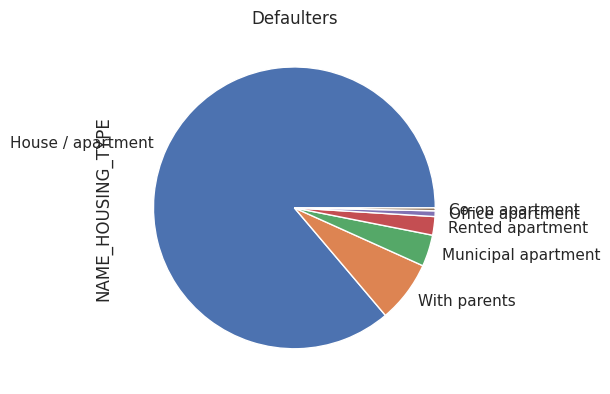

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
NON_DEFAULTERS["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.pie()
plt.title('Non Defaulters')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
DEFAULTERS["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.pie()
plt.title('Defaulters')
plt.show()

##Observatioin :-Clients living in a House/Apartments are more likely to apply and repay the loan.


Text(0.5, 1.0, 'Defaulters')

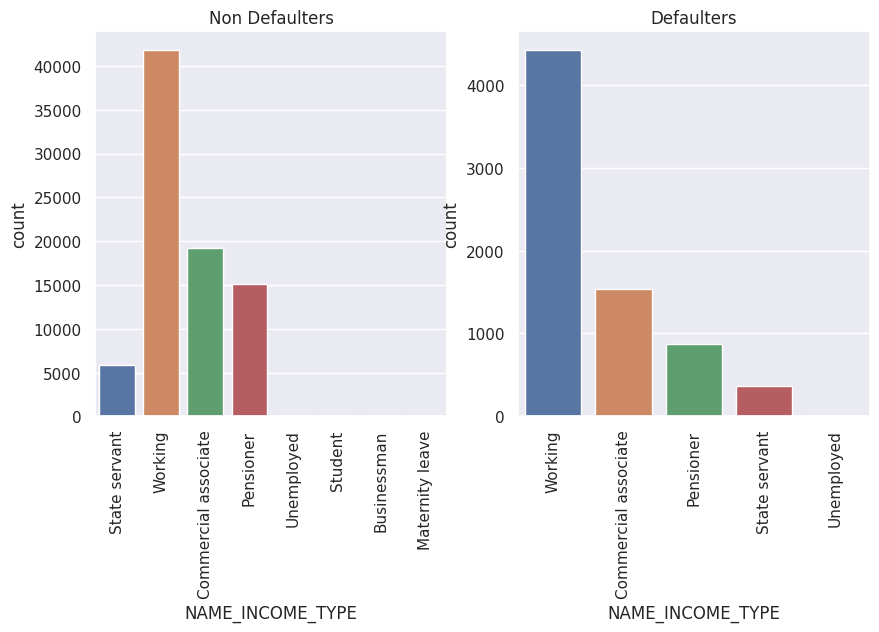

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data = NON_DEFAULTERS , x="NAME_INCOME_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data = DEFAULTERS, x = "NAME_INCOME_TYPE")
plt.xticks(rotation=90)
plt.title('Defaulters');

## Observation :- STUDENTS AND BUISNESSMAN ARE HAVING NO PAYMENT DIFFICLTY BECAUSE THEY ARE NOT IN THE LIST OF DEFAULTERS##

Text(0.5, 1.0, 'Defaulters')

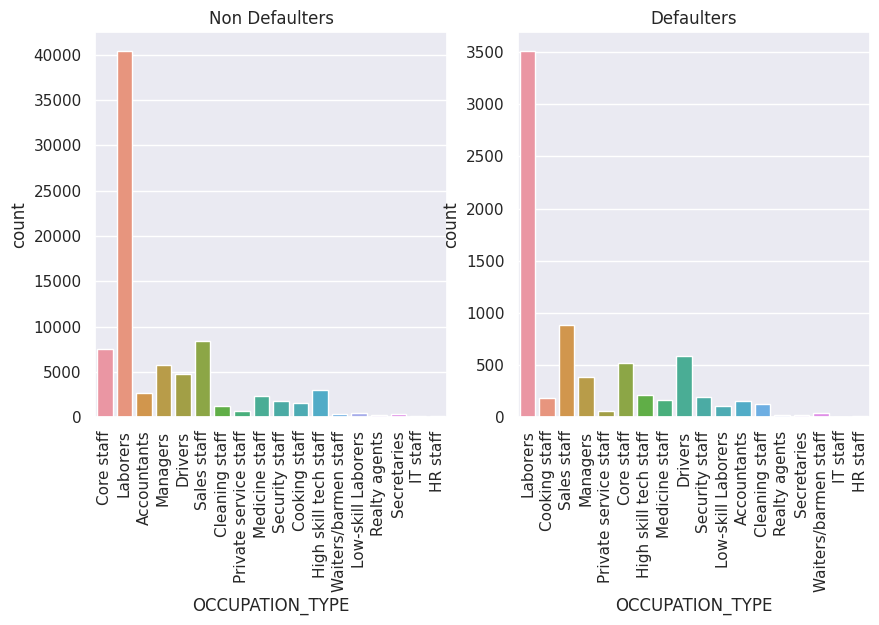

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data = NON_DEFAULTERS, x ="OCCUPATION_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data = DEFAULTERS, x ="OCCUPATION_TYPE")
plt.xticks(rotation=90)
plt.title('Defaulters');

## Observation:- Sales staff, Core Staff , Drivers have more no of defaluter rate as compared to the non defaluter rate##

Text(0.5, 1.0, 'Defaulters')

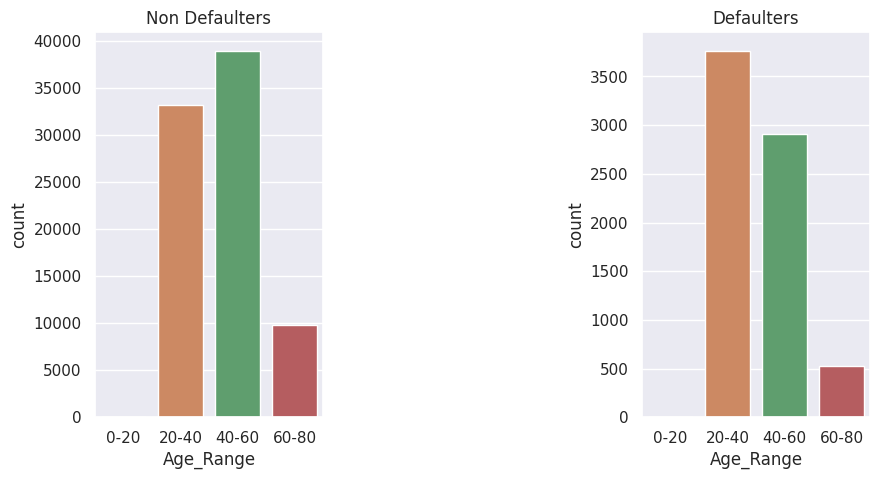

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(data = NON_DEFAULTERS, x ="Age_Range")
plt.title('Non Defaulters')


plt.subplot(1,3,3)
sns.countplot(data = DEFAULTERS , x ="Age_Range")
plt.title('Defaulters');


## Obervation :- THE AGE RANGE FORM 20-40 HAVE THE HGHEST RATE OF DEFAULTERS WHEREAS THE AGE RANGE OF 40-60 HAVE THE HIGHEST RANGE OF NON DEFAULTERS##

Text(0.5, 1.0, 'Defaulters')

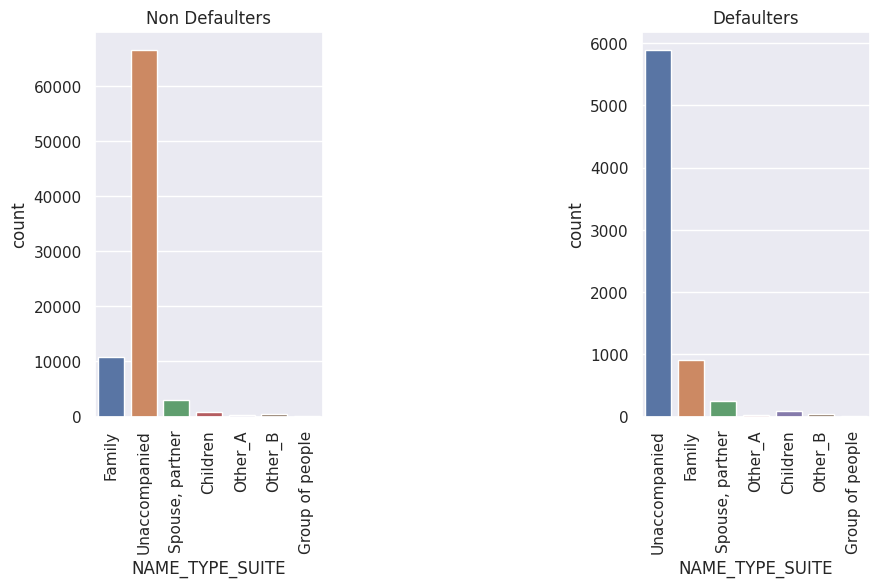

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x="NAME_TYPE_SUITE",data=NON_DEFAULTERS)
plt.title('Non Defaulters')

plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.countplot(x="NAME_TYPE_SUITE",data=DEFAULTERS)
plt.xticks(rotation=90)
plt.title('Defaulters');


## Conlusion:- Since the number of unaccompained are more there for the number of defaulters and non defaulters are also more


## Multivariant analysis##

In [ ]:
app_d_heat=app_d.corr()


In [ ]:
app_d_heat.head()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          1.000000  0.002388     -0.003176         -0.003945   
TARGET              0.002388  1.000000      0.019564          0.005236   
CNT_CHILDREN       -0.003176  0.019564      1.000000          0.009684   
AMT_INCOME_TOTAL   -0.003945  0.005236      0.009684          1.000000   
AMT_CREDIT         -0.002490 -0.030007      0.002868          0.092044   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR         -0.002490    -0.003631        -0.002799   
TARGET             -0.030007    -0.010103        -0.039196   
CNT_CHILDREN        0.002868     0.026578        -0.001572   
AMT_INCOME_TOTAL    0.092044     0.111645         0.093366   
AMT_CREDIT          1.000000     0.773380         0.986678   

                  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
SK_ID_CURR                          0.002648        -0.003576   
TARGET                             -0.040245         0.008490   
CNT_CHILDREN                       -0.024488         0.879495   
AMT_INCOME_TOTAL                    0.042633         0.011896   
AMT_CREDIT                          0.099875         0.062411   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                      -0.003336                   -0.005562   
TARGET                          -0.029714                    0.006776   
CNT_CHILDREN                    -0.005710                   -0.011322   
AMT_INCOME_TOTAL                 0.022751                    0.017742   
AMT_CREDIT                       0.054821                    0.022896   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                         -0.000916                     0.000181   
TARGET                              0.002105                    -0.001733   
CNT_CHILDREN                        0.009754                     0.015648   
AMT_INCOME_TOTAL                    0.036305                     0.034054   
AMT_CREDIT                          0.050696                     0.050770   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                     -0.005219               -0.005070   
TARGET                          0.037513                0.048364   
CNT_CHILDREN                    0.020360                0.070124   
AMT_INCOME_TOTAL                0.001653                0.002384   
AMT_CREDIT                     -0.024885               -0.015962   

                  LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
SK_ID_CURR                      -0.002578                0.000409   
TARGET                           0.032362                0.052793   
CNT_CHILDREN                     0.069429               -0.004591   
AMT_INCOME_TOTAL                 0.003843               -0.009362   
AMT_CREDIT                       0.003050               -0.078477   

                  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                         -0.008575                  -0.005864   
TARGET                              0.006132                   0.005875   
CNT_CHILDREN                        0.000290                   0.000616   
AMT_INCOME_TOTAL                    0.000736                   0.001451   
AMT_CREDIT                         -0.000093                   0.007452   

                  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                          0.003715                  -0.000387   
TARGET                              0.004991                  -0.014357   
CNT_CHILDREN                        0.001968                  -0.009085   
AMT_INCOME_TOTAL                    0.000863                   0.016292   
AMT_CREDIT                          0.000312                   0.060391   

                  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
SK_ID_CURR                         0.006388                    0.006054   
TARGET                         

<Axes: >

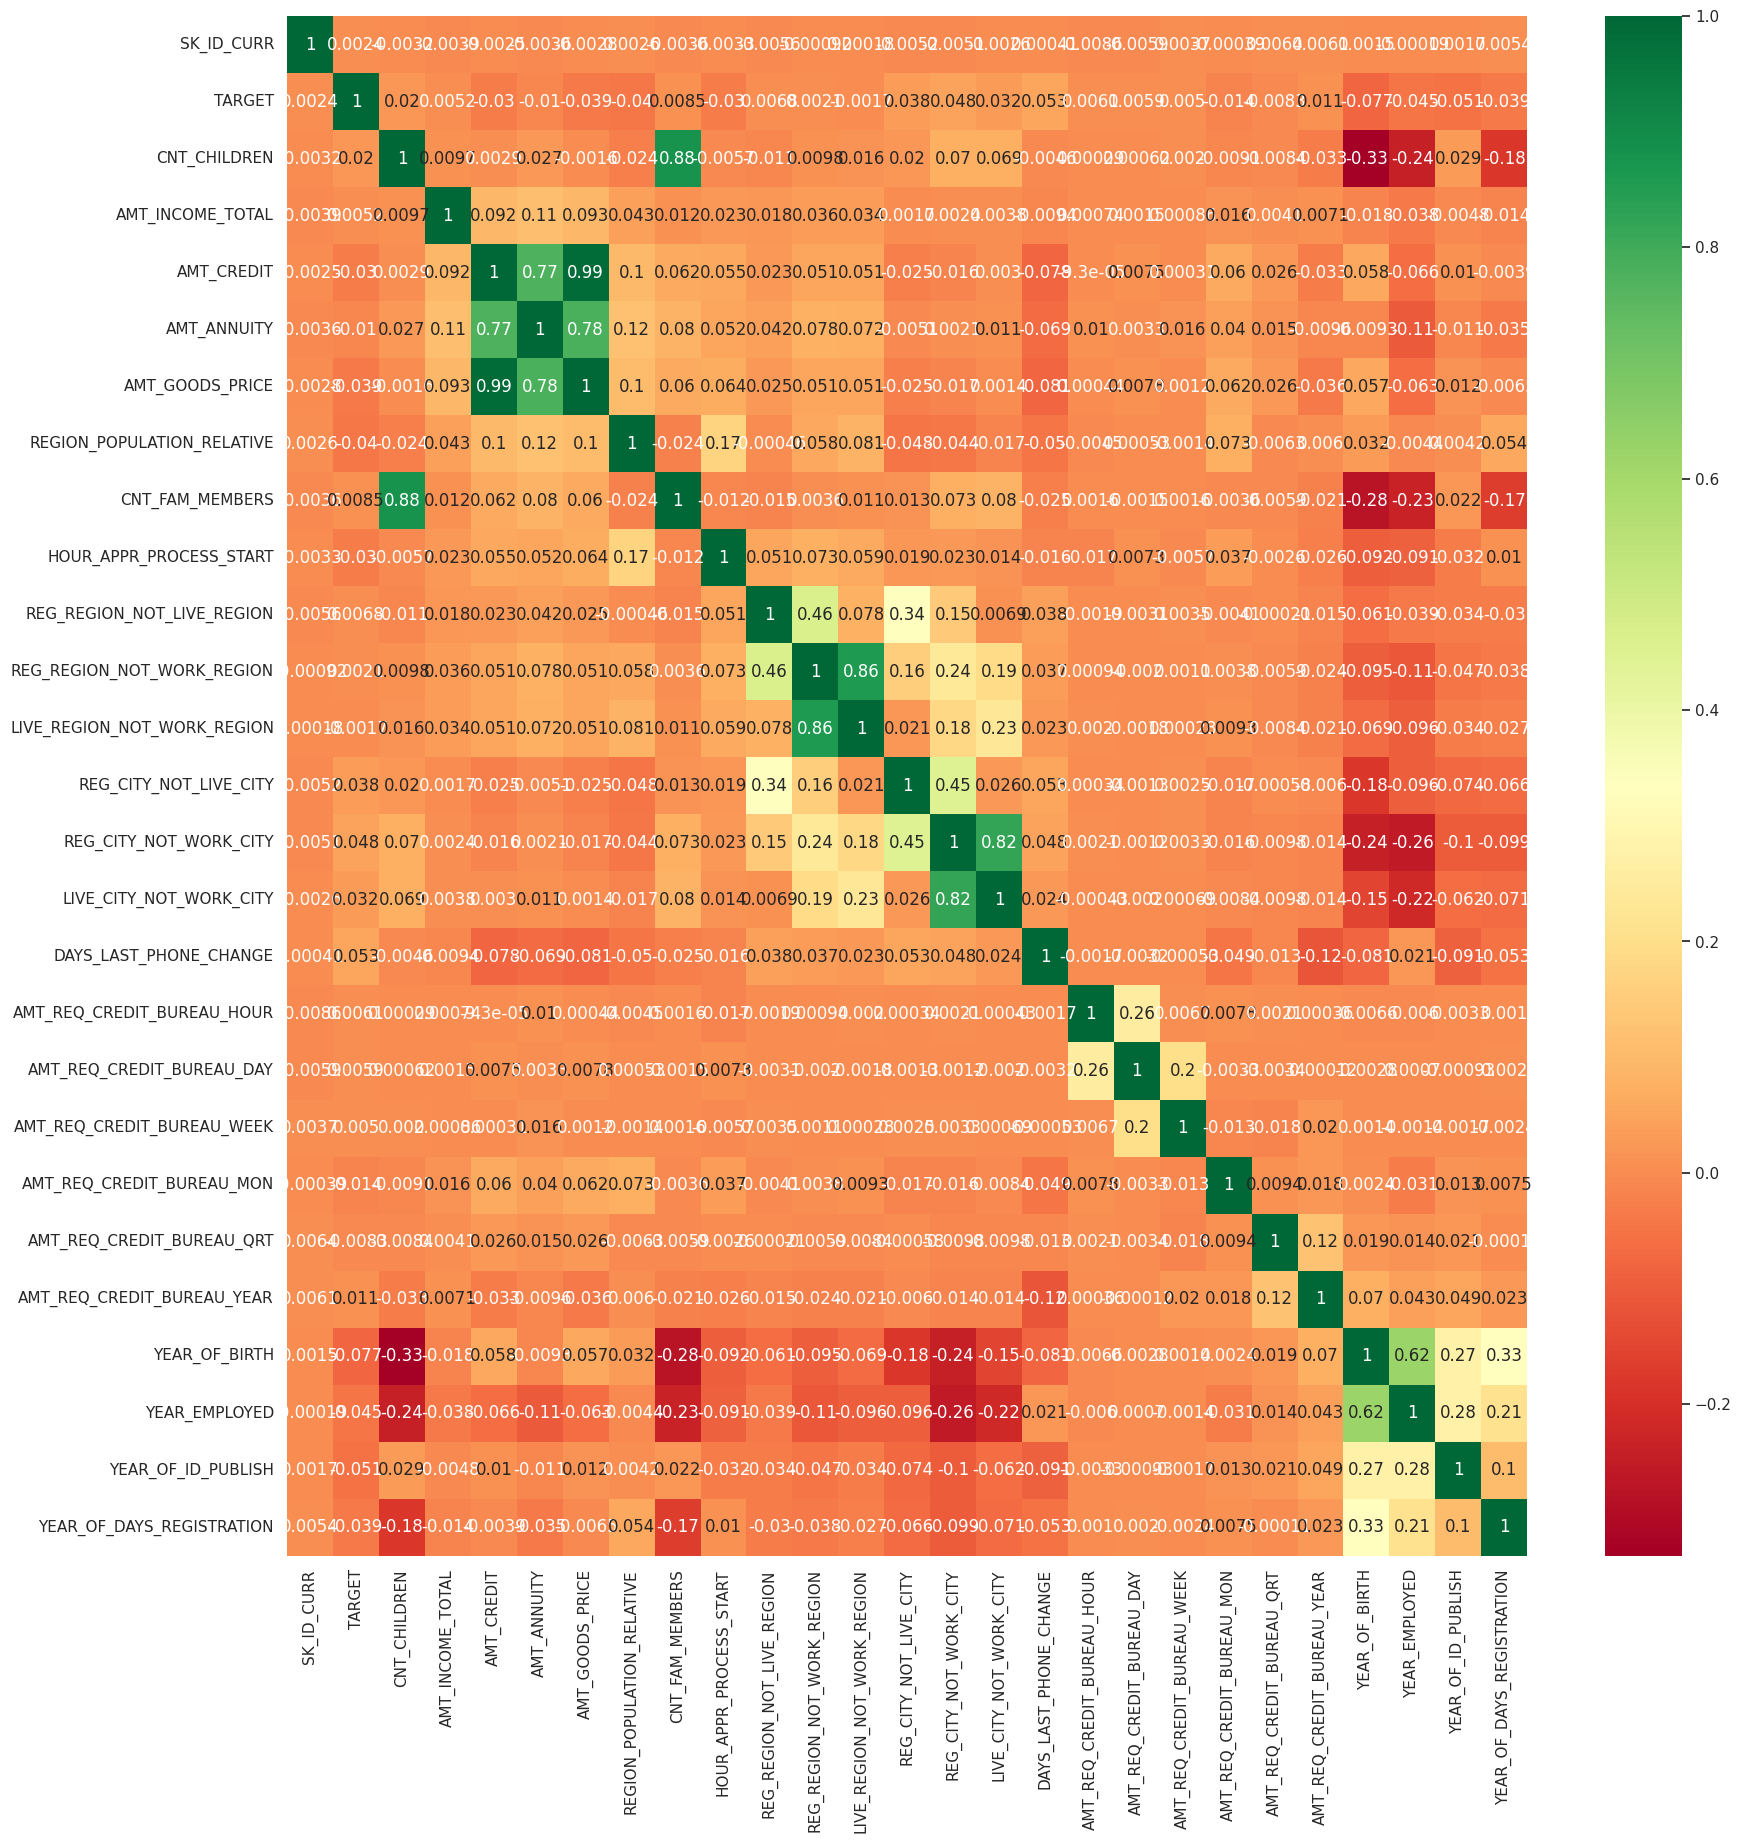

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(app_d_heat,cmap="RdYlGn",annot=True)

## Observation :- THERE IS A HIGH CORELATION BETWEEN AMT_CREDIT AND AMT GOODS PRICE AS PER THE HEAT PLOT. CNT_CHILDREN AND CNT_FAM_MEMBERS HAVE A HIGH CORELATION ABOUT 0.88



## CHECKING PREVIOUS DATA

In [ ]:
prev_d.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                     15.0                           Y   
1                     11.0                           Y   
2                     11.0                           Y   
3                      7.0                           Y   
4                      9.0                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                     1.0                0.0               0.182832   
1                     1.0                NaN                    NaN   
2                     1.0                NaN                    NaN   
3                     1.0                NaN                    NaN   
4                     1.0                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0          -73.0  Cash through the bank                XAP              NaN   
1         -164.0                    XNA                XAP    Unaccompanied   
2         -301.0  Cash through the bank                XAP  Spouse, partner   
3         -512.0  Cash through the bank                XAP              NaN   
4         -781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide              35.0         Connectivity   
1           Contact center              -1.0                  XNA   
2  Credit and cash offices              -1.0                  XNA   
3  Credit and cash offices              -1.0                  XNA   
4  Credit and cash offices              -1.0                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
prev_d.shape

(1084134, 37)

In [ ]:
(prev_d.isnull().mean()*100).sort_values(ascending = False)

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     240782
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                577651
AMT_GOODS_PRICE                 248921
WEEKDAY_APPR_PROCESS_START           1
HOUR_APPR_PROCESS_START              1
FLAG_LAST_APPL_PER_CONTRACT          1
NFLAG_LAST_APPL_IN_DAY               1
RATE_DOWN_PAYMENT               577651
RATE_INTEREST_PRIMARY          1080283
RATE_INTEREST_PRIVILEGED       1080283
NAME_CASH_LOAN_PURPOSE               1
NAME_CONTRACT_STATUS                 1
DAYS_DECISION                        1
NAME_PAYMENT_TYPE                    1
CODE_REJECT_REASON                   1
NAME_TYPE_SUITE                 532426
NAME_CLIENT_TYPE                     1
NAME_GOODS_CATEGORY                  1
NAME_PORTFOLIO                       1
NAME_PRODUCT_TYPE                    1
CHANNEL_TYPE             

In [ ]:
previous_null=(prev_d.isnull().mean()*100).sort_values(ascending = False) * 100


In [ ]:
previous_drop=previous_null[previous_null>=50].index
previous_drop.tolist()

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT']

In [ ]:
prev_d.drop(previous_drop,axis=1,inplace=True)

##These 4 columns need to be droped because:
1) FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY" ,These two of the columns are flag variable which has binary values and no relation with the target variable hance can be dropped

2) WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START", these Two columns have no relation with the target varibale hanced can be dropped##

In [ ]:
previous_drop2=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]

In [ ]:
prev_d.drop(previous_drop2,axis=1,inplace=True)

In [ ]:
(prev_d.isnull().mean()*100).sort_values(ascending = False)

NAME_TYPE_SUITE              49.110719
NFLAG_INSURED_ON_APPROVAL    40.104452
DAYS_TERMINATION             40.104452
DAYS_LAST_DUE                40.104452
DAYS_LAST_DUE_1ST_VERSION    40.104452
DAYS_FIRST_DUE               40.104452
DAYS_FIRST_DRAWING           40.104452
AMT_GOODS_PRICE              22.960354
AMT_ANNUITY                  22.209616
CNT_PAYMENT                  22.209432
PRODUCT_COMBINATION           0.021492
NAME_PRODUCT_TYPE             0.000092
NAME_YIELD_GROUP              0.000092
NAME_SELLER_INDUSTRY          0.000092
SELLERPLACE_AREA              0.000092
CHANNEL_TYPE                  0.000092
NAME_GOODS_CATEGORY           0.000092
NAME_PORTFOLIO                0.000092
NAME_CLIENT_TYPE              0.000092
CODE_REJECT_REASON            0.000092
NAME_PAYMENT_TYPE             0.000092
DAYS_DECISION                 0.000092
NAME_CONTRACT_STATUS          0.000092
NAME_CASH_LOAN_PURPOSE        0.000092
AMT_CREDIT                    0.000092
SK_ID_CURR               

## CHECKING DATA FRAME AND HANDLING MISSING VALUES AND OBSERVING OUTLIERS##

CHECKING FOR NEGATIVE VALUE IN THE DATA FRAME 

In [ ]:
for column_name,data in prev_d.iteritems():
    print(column_name ," :::: ",data[0])

SK_ID_PREV  ::::  2030495
SK_ID_CURR  ::::  271877
NAME_CONTRACT_TYPE  ::::  Consumer loans
AMT_ANNUITY  ::::  1730.43
AMT_APPLICATION  ::::  17145.0
AMT_CREDIT  ::::  17145.0
AMT_GOODS_PRICE  ::::  17145.0
NAME_CASH_LOAN_PURPOSE  ::::  XAP
NAME_CONTRACT_STATUS  ::::  Approved
DAYS_DECISION  ::::  -73.0
NAME_PAYMENT_TYPE  ::::  Cash through the bank
CODE_REJECT_REASON  ::::  XAP
NAME_TYPE_SUITE  ::::  nan
NAME_CLIENT_TYPE  ::::  Repeater
NAME_GOODS_CATEGORY  ::::  Mobile
NAME_PORTFOLIO  ::::  POS
NAME_PRODUCT_TYPE  ::::  XNA
CHANNEL_TYPE  ::::  Country-wide
SELLERPLACE_AREA  ::::  35.0
NAME_SELLER_INDUSTRY  ::::  Connectivity
CNT_PAYMENT  ::::  12.0
NAME_YIELD_GROUP  ::::  middle
PRODUCT_COMBINATION  ::::  POS mobile with interest
DAYS_FIRST_DRAWING  ::::  365243.0
DAYS_FIRST_DUE  ::::  -42.0
DAYS_LAST_DUE_1ST_VERSION  ::::  300.0
DAYS_LAST_DUE  ::::  -42.0
DAYS_TERMINATION  ::::  -37.0
NFLAG_INSURED_ON_APPROVAL  ::::  0.0


In [ ]:
## CONVERTING THE NEGATIVE DATA TYPES IN TO POSITIVE DATA TYPE

In [ ]:
prev_d["DAYS_DECISION"]=abs(prev_d["DAYS_DECISION"])

In [ ]:
prev_d["SELLERPLACE_AREA"]=abs(prev_d["SELLERPLACE_AREA"])

In [ ]:
prev_d.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 603088
XNA                                 436306
Repairs                              15232
Other                                 9973
Urgent needs                          5490
Buying a used car                     1840
Building a house or an annex          1735
Everyday expenses                     1537
Medicine                              1440
Payments on other loans               1250
Education                             1010
Journey                                768
Purchase of electronic equipment       666
Buying a new car                       655
Wedding / gift / holiday               619
Buying a home                          566
Car repairs                            505
Furniture                              489
Buying a holiday home / land           343
Business development                   263
Gasification / water supply            210
Buying a garage                         90
Hobby                                   33
Money for a

In [ ]:
### REPLACING XNA  and XAP TO UNKNOWN AND UNKNOWN1 SINCE THEY ARE HE HIGHEST VALUES ITS DIFFICULT 
###TO PERFORM ANY OPERATION ON THEM

prev_d["NAME_CASH_LOAN_PURPOSE"].replace("XAP","Unknown",inplace=True)

In [ ]:
prev_d["NAME_CASH_LOAN_PURPOSE"].replace("XNA","Unknown1",inplace=True)

In [ ]:
prev_d.NAME_CASH_LOAN_PURPOSE.value_counts()[:2]

Unknown     603088
Unknown1    436306
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [ ]:
##  REPLACING XNA TO THE MOST REPEATED VALUE THAT IS CASH LOANS AND REPEATER
prev_d["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         481045
Consumer loans     477499
Revolving loans    125358
XNA                   232
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
prev_d["NAME_CONTRACT_TYPE"].replace("XNA","Unknown",inplace=True)

In [ ]:
prev_d["NAME_CLIENT_TYPE"].value_counts()

Repeater     797739
New          196740
Refreshed     88403
XNA            1251
Name: NAME_CLIENT_TYPE, dtype: int64

In [ ]:
prev_d["NAME_CLIENT_TYPE"].replace("XNA","Unknown",inplace=True)

<Axes: >

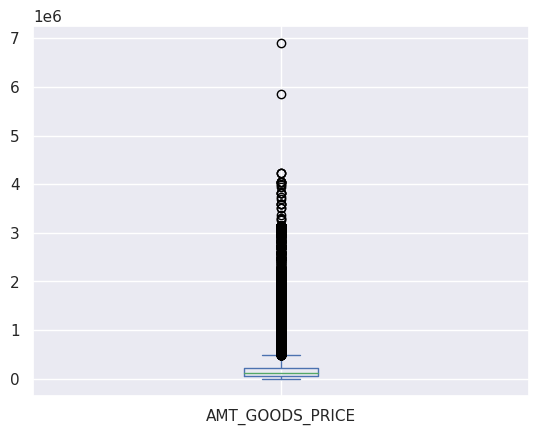

In [ ]:
prev_d["AMT_GOODS_PRICE"].plot.box()          


In [ ]:
## REPLACING THE NULL VALUES OF AMT_GOODS_PRICE WITH MEDIAN 

In [ ]:
prev_d["AMT_GOODS_PRICE"].fillna(prev_d["AMT_GOODS_PRICE"].median(),inplace=True)

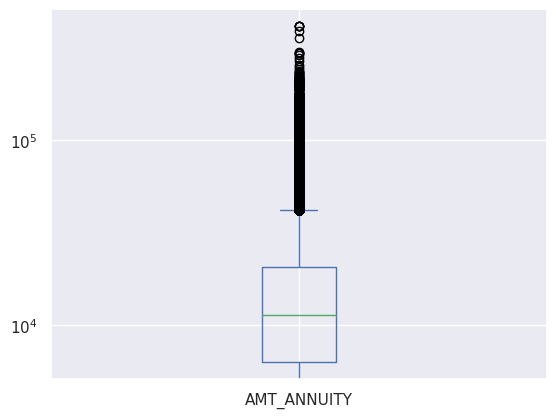

In [ ]:
prev_d["AMT_ANNUITY"].plot.box()  
plt.yscale("log")

In [ ]:
## REPLACING THE NULL VALUES OF AMT_ANNUITY WITH MEDIAN 

In [ ]:
prev_d["AMT_ANNUITY"].fillna(prev_d["AMT_ANNUITY"].median(),inplace=True)

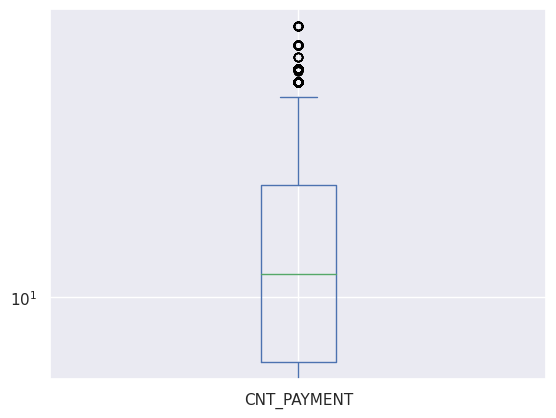

In [ ]:
prev_d["CNT_PAYMENT"].plot.box()
plt.yscale("log")

In [ ]:
## REPLACING THE NULL VALUES OF CNT_PAYMENT  WITH MEDIAN 

In [ ]:
prev_d["CNT_PAYMENT"].fillna(prev_d["CNT_PAYMENT"].median(),inplace=True)

In [ ]:
##UNIVARIATE ANALYSIS

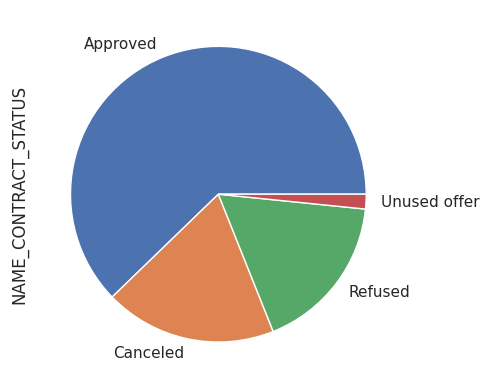

In [ ]:
prev_d["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct = '%2.2f%%');

##Observation :- The rate of APPROVAL is higher in comparison to any othrt type of status.

<Axes: >

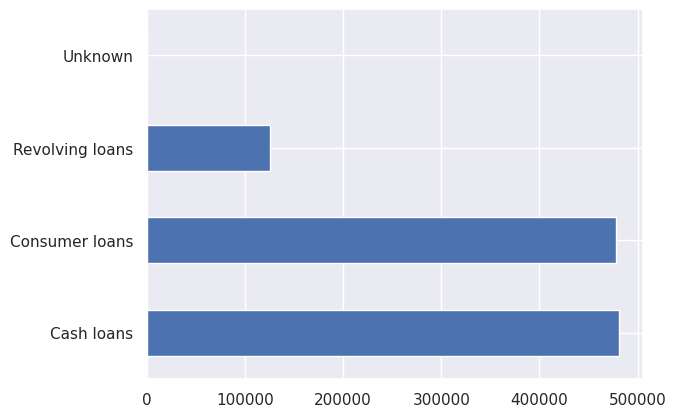

In [ ]:
prev_d["NAME_CONTRACT_TYPE"].value_counts().plot.barh();

##Observation :- The CASH LOAN ARE MORE IN COMPARISON TO ANY OTHER TYOE OF LOANS


<Axes: >

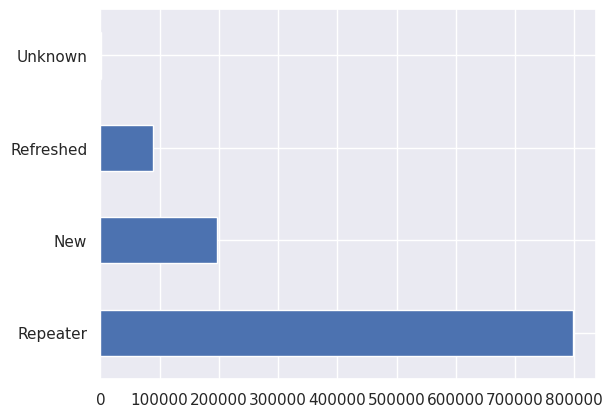

In [ ]:
prev_d["NAME_CLIENT_TYPE"].value_counts().plot.barh();

## Observation :- Repeter clients are more in comparison to others 

## Bi-VARIATE ANALYSIS

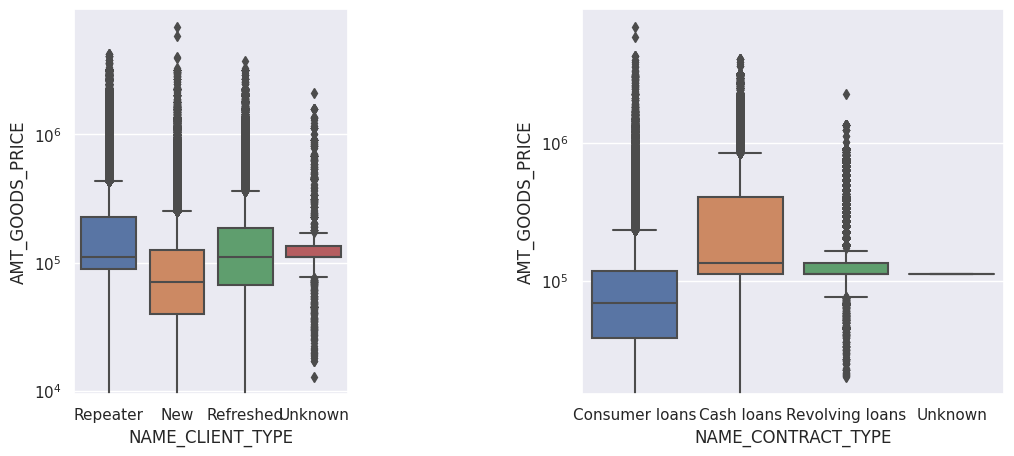

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x="NAME_CLIENT_TYPE",y="AMT_GOODS_PRICE",data=prev_d)
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(x="NAME_CONTRACT_TYPE",y="AMT_GOODS_PRICE",data=prev_d)
plt.yscale("log")

## Observation :- Repeaters have the highest AMT_GOODS_PRICE CASH LOANS are also more in comparison to other loans

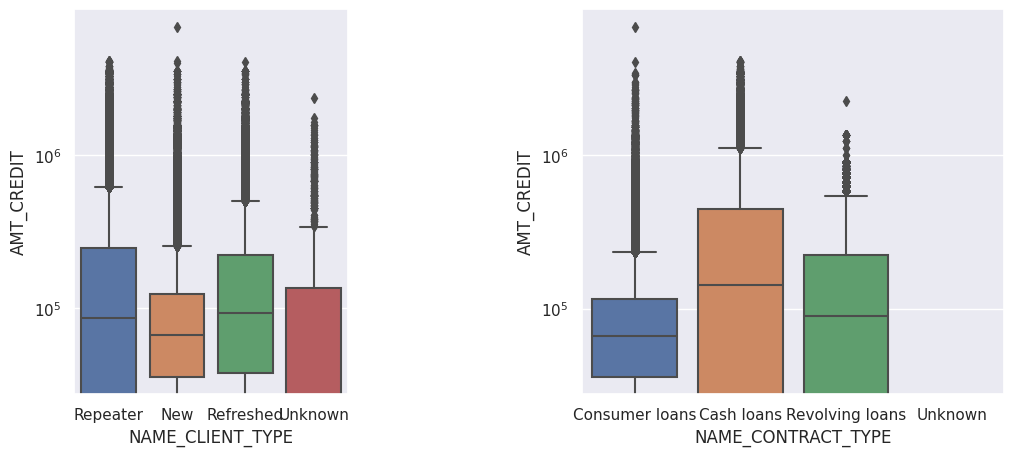

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x="NAME_CLIENT_TYPE",y="AMT_CREDIT",data=prev_d)
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(x="NAME_CONTRACT_TYPE",y="AMT_CREDIT",data=prev_d)
plt.yscale("log")


## Observation :- Repeaters and Cash loan have the higest value in comparison to AMT_CREDIT

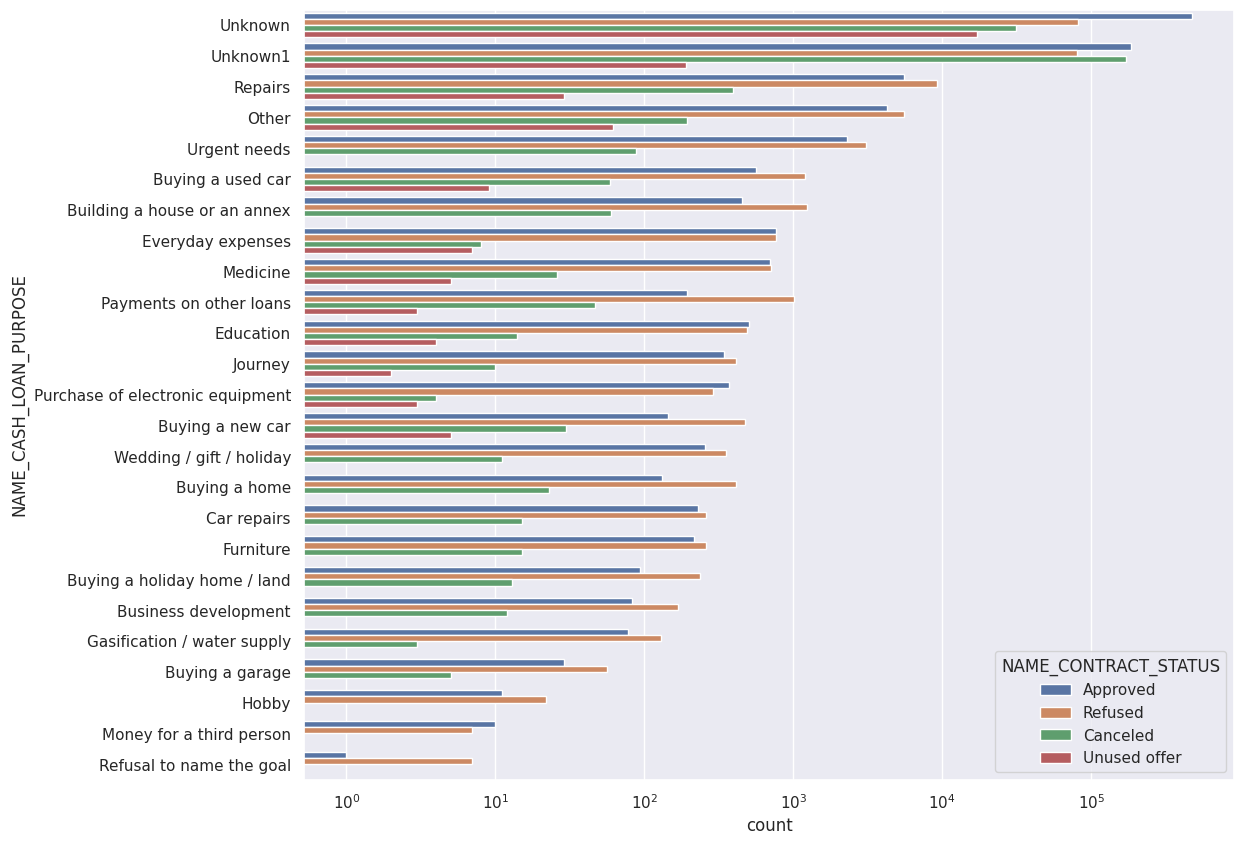

In [ ]:
plt.figure(figsize=(12,10))

sns.countplot(data=prev_d,y="NAME_CASH_LOAN_PURPOSE",order=prev_d["NAME_CASH_LOAN_PURPOSE"].value_counts().index
              ,hue="NAME_CONTRACT_STATUS" )      
plt.xscale("log")

## Observation :- THE NUMBER OF REFUSED LOANS ARE FOR LOANS ARE FOR REPAIR PURPOSE UNKNOWN AND UNKNOWN 1 ARE ALSO VERY POPULAR

In [ ]:
sns.countplot(x="NAME_CLIENT_TYPE" ,hue="NAME_CONTRACT_STATUS",data=prev_d);

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

## Observation:- Repeater have high rate of APPROVAL then comes New Clients when compared it with Repeaters.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

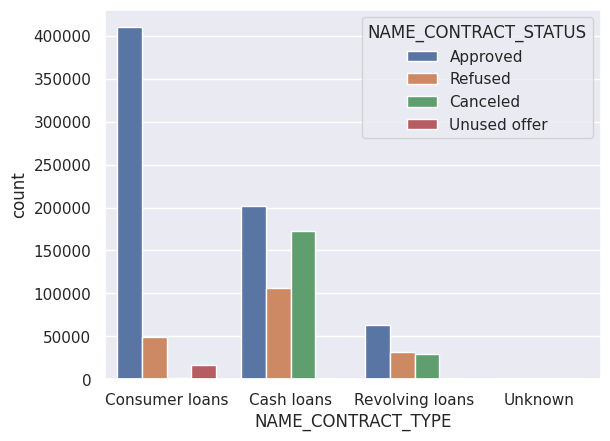

In [ ]:
sns.countplot(x="NAME_CONTRACT_TYPE" ,hue="NAME_CONTRACT_STATUS",data=prev_d);

## Observation :- Consumers Loans are have more chances to be approved and cash loans have high Refusal rate##

In [ ]:
### Categorical Col
categ = prev_d.select_dtypes("object").columns
categ

['NAME_YIELD_GROUP',
 'NAME_PRODUCT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_TYPE_SUITE',
 'PRODUCT_COMBINATION',
 'NAME_PAYMENT_TYPE',
 'CHANNEL_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_SELLER_INDUSTRY',
 'NAME_GOODS_CATEGORY',
 'NAME_CONTRACT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CODE_REJECT_REASON']

In [ ]:
sns.countplot(x="NAME_TYPE_SUITE" ,hue="NAME_CONTRACT_STATUS",data=prev_d)
plt.xticks(rotation=90);

## Observation:- Unaccompained and Famliy type have are the top 2 approval##

In [ ]:
prev_d.NAME_PRODUCT_TYPE.value_counts()

XNA        693488
x-sell     293644
walk-in     97001
Name: NAME_PRODUCT_TYPE, dtype: int64

##Final Observation :-
1) THE RATE OF APPROVAL IS HIGHER IN COMPARISON TO ANY OTHER TYPE OF STATUS

2) The CASH LOAN ARE MORE IN COMPARISON TO ANY OTHER TYPE OF LOANS

3) REPETER ARE MORE IN COMPARISON TO OTHERS

4)REPEATERS HAVE THE HIGHEST AMT_GOODS_PRICE AS COMAPARED AND THE CASH LOANS ARE MORE IN COMPARISON TO OTHER LOANS

5) THE NUMBER OF REFUSED LOANS ARE FOR REPAIR PURPOSE.##

## MERGING DATA FRAME##

In [ ]:
merged_d=pd.merge(app_d,prev_d,on="SK_ID_CURR",suffixes=('_application', '_Previous'))

In [ ]:
merged_d.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_application',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_application',
 'AMT_ANNUITY_application',
 'AMT_GOODS_PRICE_application',
 'NAME_TYPE_SUITE_application',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEAR_OF_BIRTH',
 'YEAR_EMPLOYED',
 'YEAR_OF_ID_PUBLISH',
 'YEAR_OF_DAYS_REGISTRATION',
 'BUISNESS_T

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

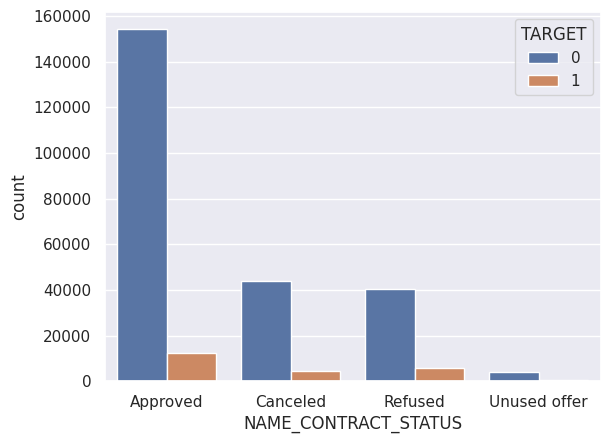

In [ ]:
sns.countplot(data=merged_d,x="NAME_CONTRACT_STATUS",hue="TARGET");

## Observation :- Approved status is high of Non Defaulters##

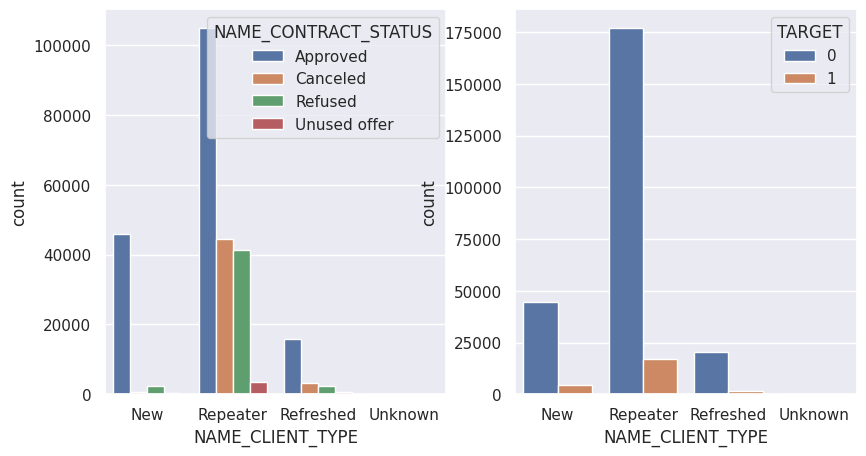

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.countplot(x="NAME_CLIENT_TYPE",data=merged_d,hue="NAME_CONTRACT_STATUS")

plt.subplot(1,3,2)

sns.countplot(x="NAME_CLIENT_TYPE",data=merged_d,hue="TARGET");

## Observation :- Repeater are more refused as compared to any other considering their Credit history##

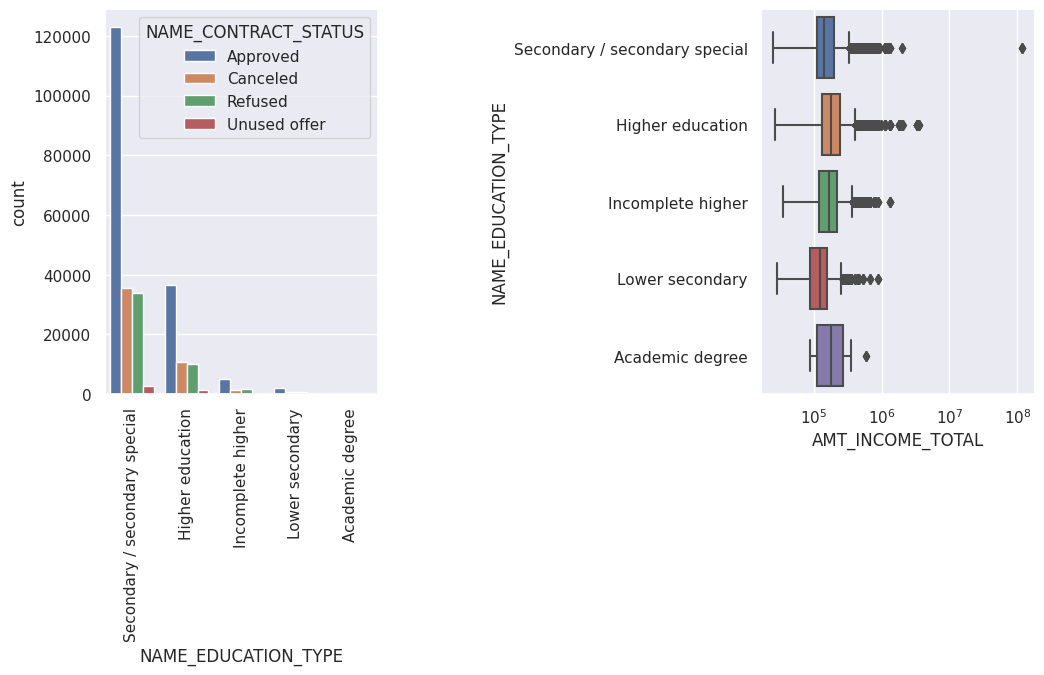

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.countplot(x="NAME_EDUCATION_TYPE",data=merged_d,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

plt.subplot(1,3,3)
sns.boxplot(x="AMT_INCOME_TOTAL",y="NAME_EDUCATION_TYPE",data=merged_d)
plt.xscale("log");

## Observation :- Secondary Education has the Highest Approval rate ,although the Income of Academic degree holder are more in comparison Secondary education still the approval rate of Secondary Education is more than Academic Degree holders



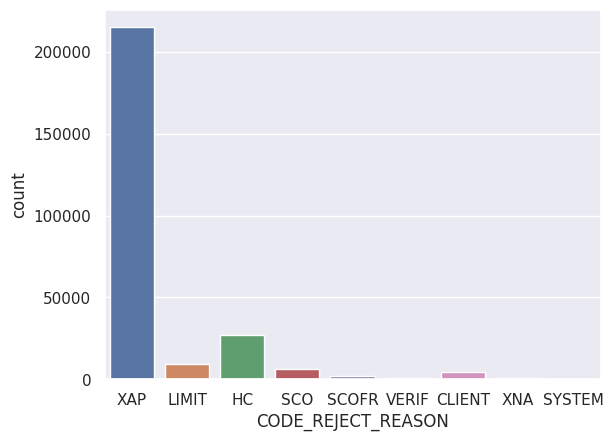

In [ ]:
sns.countplot(data=merged_d, x='CODE_REJECT_REASON');

## Observation :- XAP AN UNKNOW VARIABLE ARE HAS THE HIGHEST REJECTION RATE##

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE_application'>

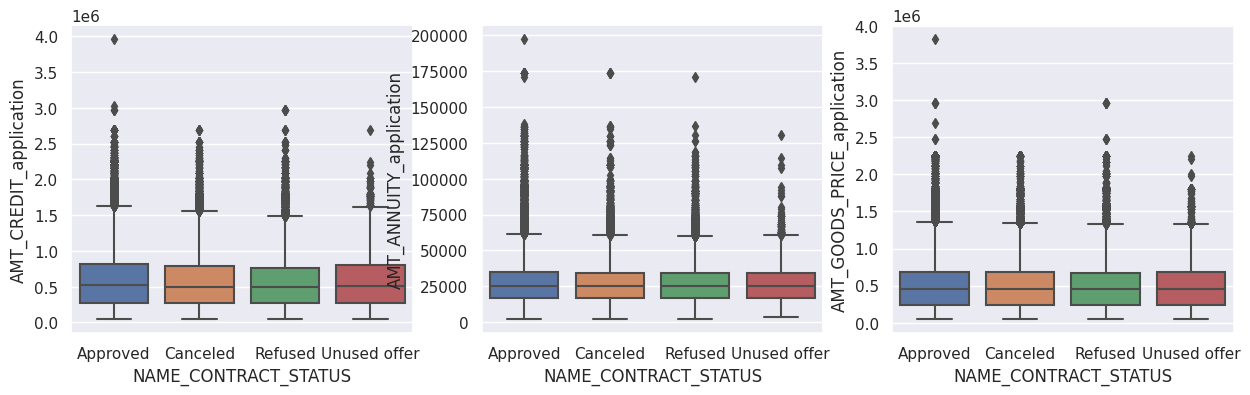

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_CREDIT_application",data=merged_d)
plt.subplot(1,3,2)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_ANNUITY_application",data=merged_d)
plt.subplot(1,3,3)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_GOODS_PRICE_application",data=merged_d);

## Observation :- FOR AMT_CREDIT_application,AMT_ANNUITY_application,AMT_GOODS_PRICE_application they all have the same value with respect to Contract Status##

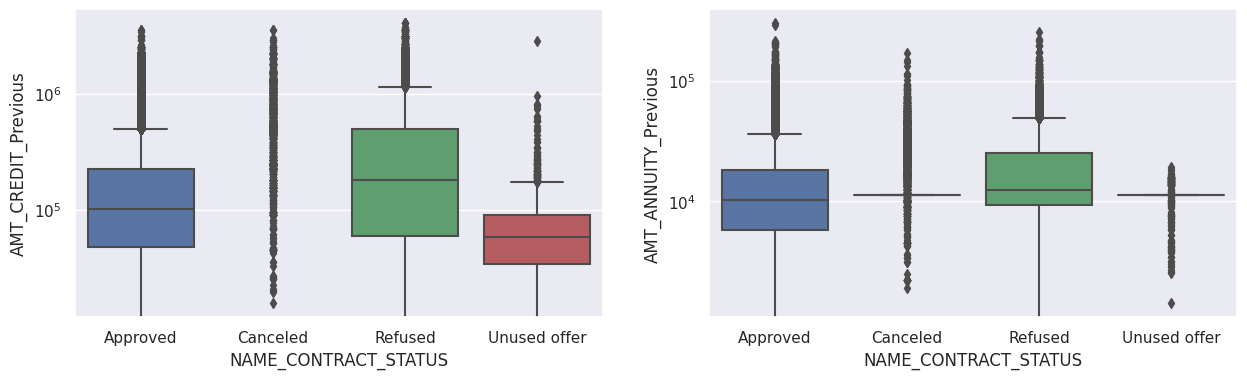

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_CREDIT_Previous",data=merged_d)
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_ANNUITY_Previous",data=merged_d)
plt.yscale("log")

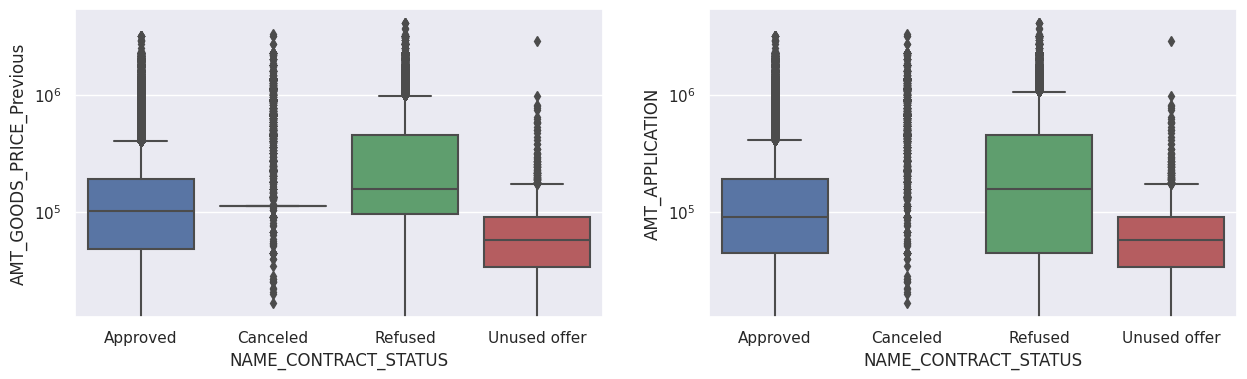

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_GOODS_PRICE_Previous",data=merged_d)
plt.yscale("log")

plt.subplot(1,2,2)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_APPLICATION",data=merged_d)
plt.yscale("log");


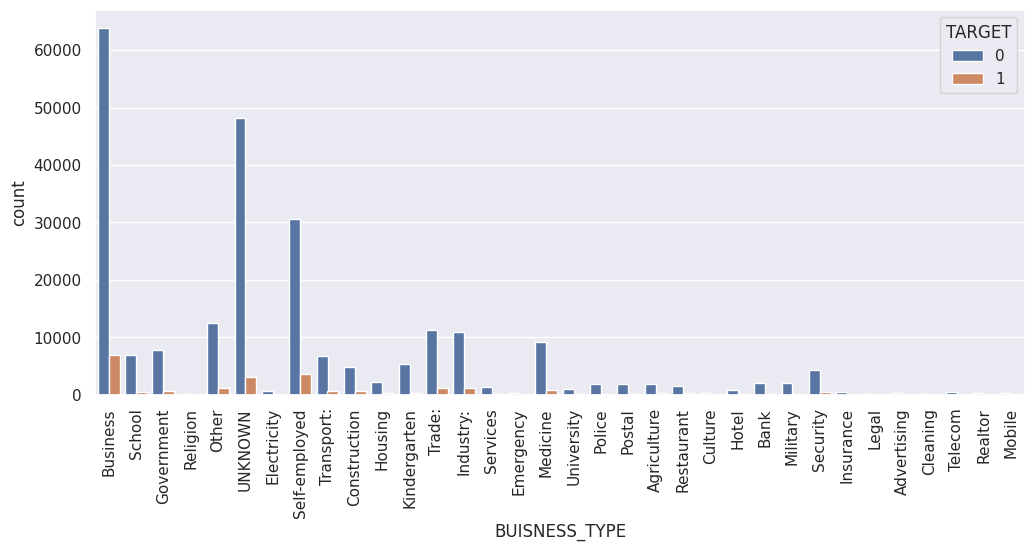

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="BUISNESS_TYPE",data=merged_d,hue="TARGET")
plt.xticks(rotation=90);

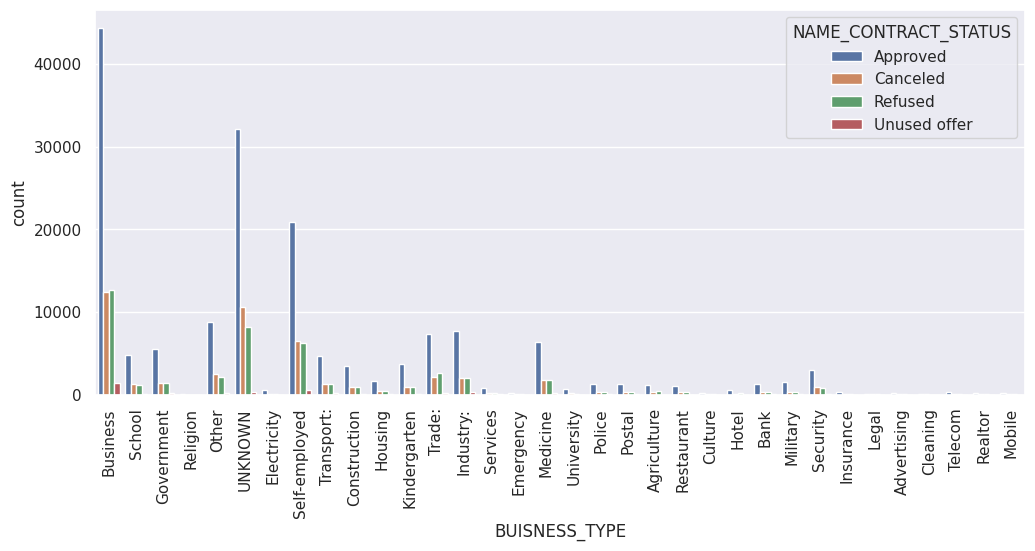

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="BUISNESS_TYPE",data=merged_d,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

## Observation:- Buisness , Unknown and Self -Employed are the top 3 occupation where approval rate is more than any other occupation##

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

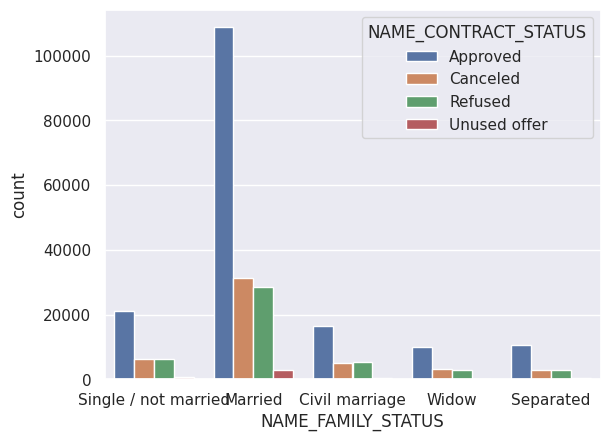

In [ ]:
sns.countplot(x="NAME_FAMILY_STATUS",data=merged_d,hue="NAME_CONTRACT_STATUS");


## Observation :- Married people are more likely to get Loan approved in comparison to any other maritial status of people.##

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

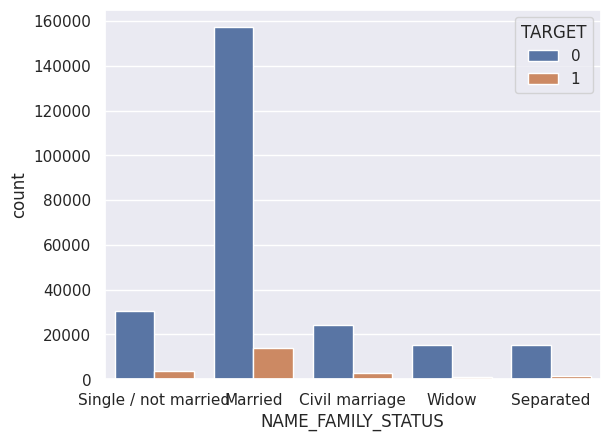

In [ ]:
sns.countplot(x="NAME_FAMILY_STATUS",data=merged_d,hue="TARGET");


## Observation :- Married people are more likely to get Loab approved in comparison to any other maritial status of people.##

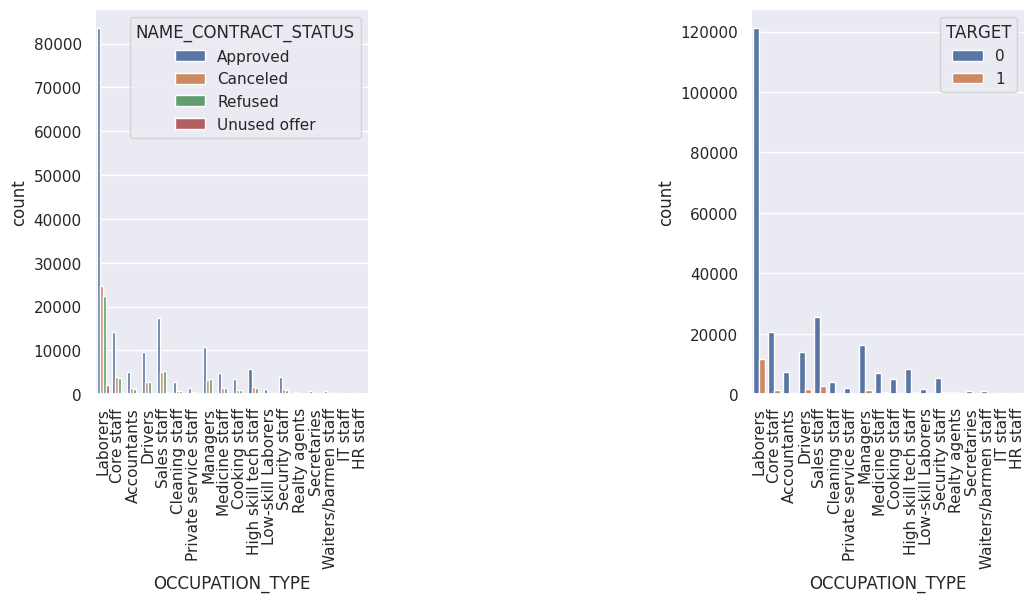

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)

sns.countplot(x="OCCUPATION_TYPE",data=merged_d,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);
plt.subplot(1,3,3)

sns.countplot(x="OCCUPATION_TYPE",data=merged_d,hue="TARGET")
plt.xticks(rotation=90);

## Observation :- Laborers,Core Staff and Sales Staff is the occupation type that has the loan approved and has the higest approval rate##

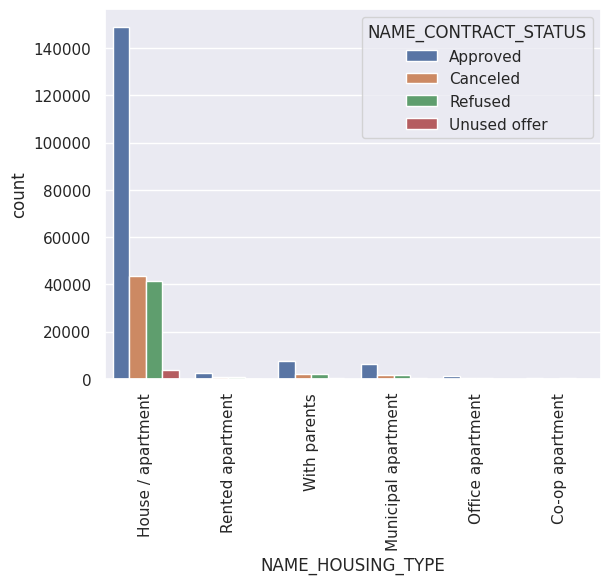

In [ ]:
sns.countplot(x="NAME_HOUSING_TYPE",hue="NAME_CONTRACT_STATUS",data=merged_d);
plt.xticks(rotation=90);

## Observation:- House/Appratment have the higest approval rate##

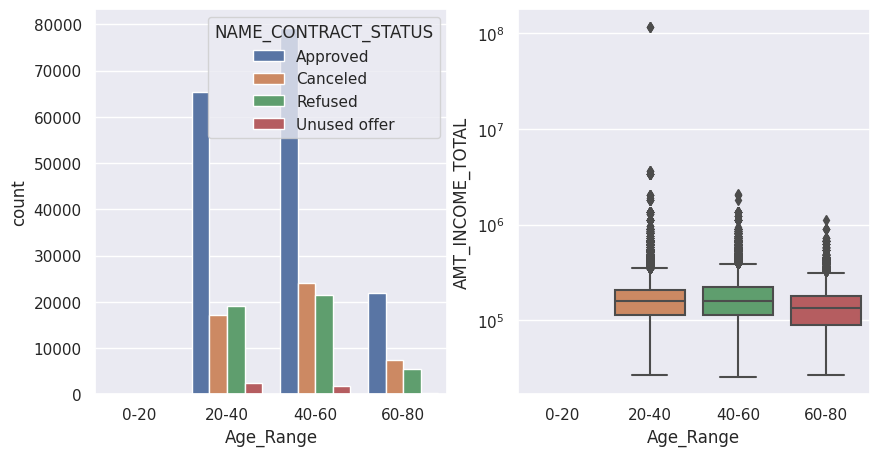

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="Age_Range",hue="NAME_CONTRACT_STATUS",data=merged_d)
plt.subplot(1,2,2)
sns.boxplot(x="Age_Range",y="AMT_INCOME_TOTAL",data=merged_d)
plt.yscale("log");


<Axes: xlabel='Age_Range', ylabel='count'>

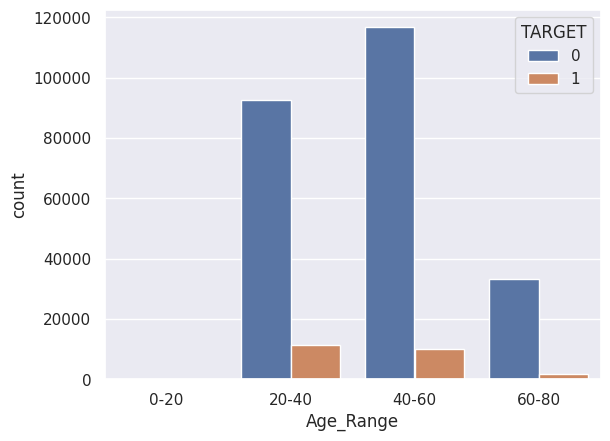

In [ ]:
sns.countplot(x="Age_Range",hue="TARGET",data=merged_d);

## Observation:-When analyzing the age range , it is noticed that there is not much of difference in the income of people of age range 20-40,40-60, furthermore the approval rate of people with age range 40-60 has the highest##

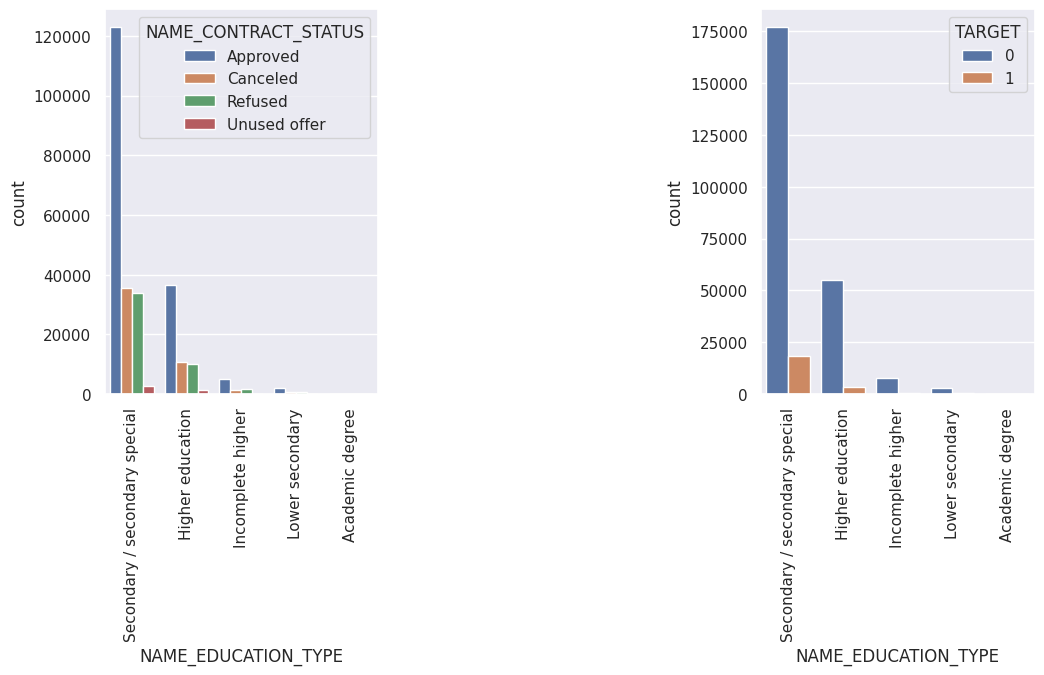

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)

sns.countplot(x="NAME_EDUCATION_TYPE",data=merged_d,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);
plt.subplot(1,3,3)

sns.countplot(x="NAME_EDUCATION_TYPE",data=merged_d,hue="TARGET")
plt.xticks(rotation=90);

##FINAL OBSERVATION:
Target variable for Application dataset - "TARGET"
Target variable for Previous dataset - "NAME_CONTRACT_STATUS"

1) The rate of defaulters are less in the range of 40-60 are good target audience.

2) Laborers , Core and Sales Staff is the occupation type that has the loan approved and has the higest non defulter rate.

3) Married people are more likely to get loan approved in comprisoion to any other Maritial Status of the people so this is
also a good target audience .

4) Secondary Education has the Highest Approval rate ,although the Income of Academic degree holder are more in
comparison Secondary education still the approval rate is more than Academic Degree holders.##

**Thank You**